# 프로젝트 : House Prices: Advanced Regression Techniques
==================================================================================================================

## 1. 팀소개
### 1) 팀명 : 데르렁팀
 
### 2) 팀원 :  
   >  김명학 : 그래프와 코닝튜닝 및 장소섭외     
 
   >  조아라 : 데이터 분석과 성능 및 간식담당 
 
   >  기성환 : 팀의 진행상황 보고 및 깃헙 관리  


## 2. 데이터 소개
### 2.1 목           표 : Test Data의  SalePrice (집값) 예측

### 2.2 데이터 :
   > - 집값 예측 데이터는 미국 Ames. Iowa 지역의 데이터

   > - Train Data : 1460개 집값 데이터와 집값이 포함된 81개의 변수로 구성

   > - Test Data  : 1459개 집값 데이터와 집값이 제외된 80개의 변수로 구성

   > - 총 Data : 2919개 집값 데이터
   > - [데이터 출처 : House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques "House Prices: Advanced Regression Techniques")

### 2.3 평기기준 
   > - Root-Mean-Squared-Error (RMSE)  

$$
RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}
$$

### 2.4 경연관련:
   > - 시작 : 8/30/2016

   > - 마감 : 3/01/2017

   > - 참가팀 : 총 4469팀 (2018.3.13 기준)
   
   > - 일일 제출 제한 횟수 : 5 회 / 일

 
## 3. 진행 순서

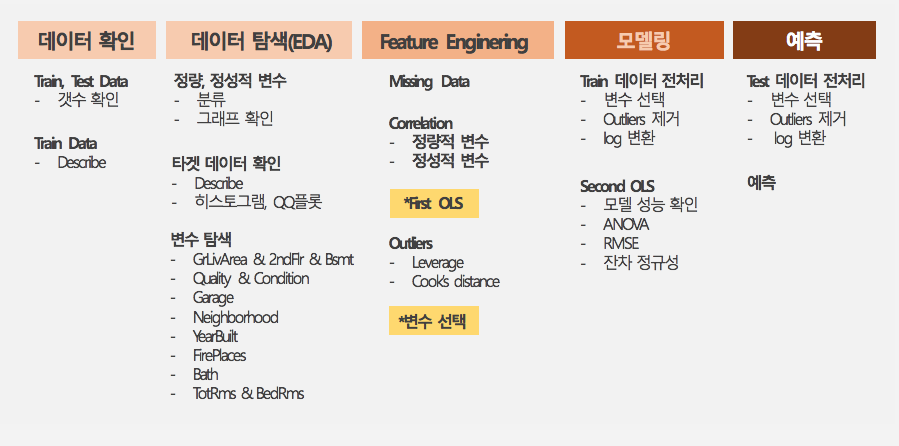

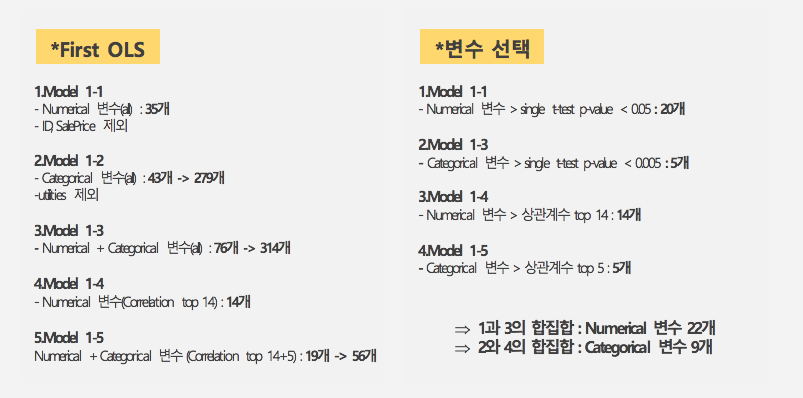

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from pandas.core import datetools
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm, skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. EDA 
### 1-1 데이터 소개
#### (1) 데이터 불러오기

In [2]:
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")

#### (2) 데이터 갯수확인

In [3]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


#### Comment : Test 데이터에 SalePrice 열이 제외되었고 제외된 Test 데이터의 SalePrice를 예측하는 것이 이 경연대회의 목표이다

#### (3) Train 데이터 현황

In [4]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

#### Comment :
1. Count : LotFrontage, MasVnrArea 등 일부 데이터가 분실된 것을 확인 
2. Mean & 50% : 데이터가 특정값에 치우침이 있음
3. min & 25% & 50% & 75% & max : 데이터의 값이 없는 항목들이 다수 발견이 되어있음 

#### (4) 타겟 데이터 (SalePrice) 탐색

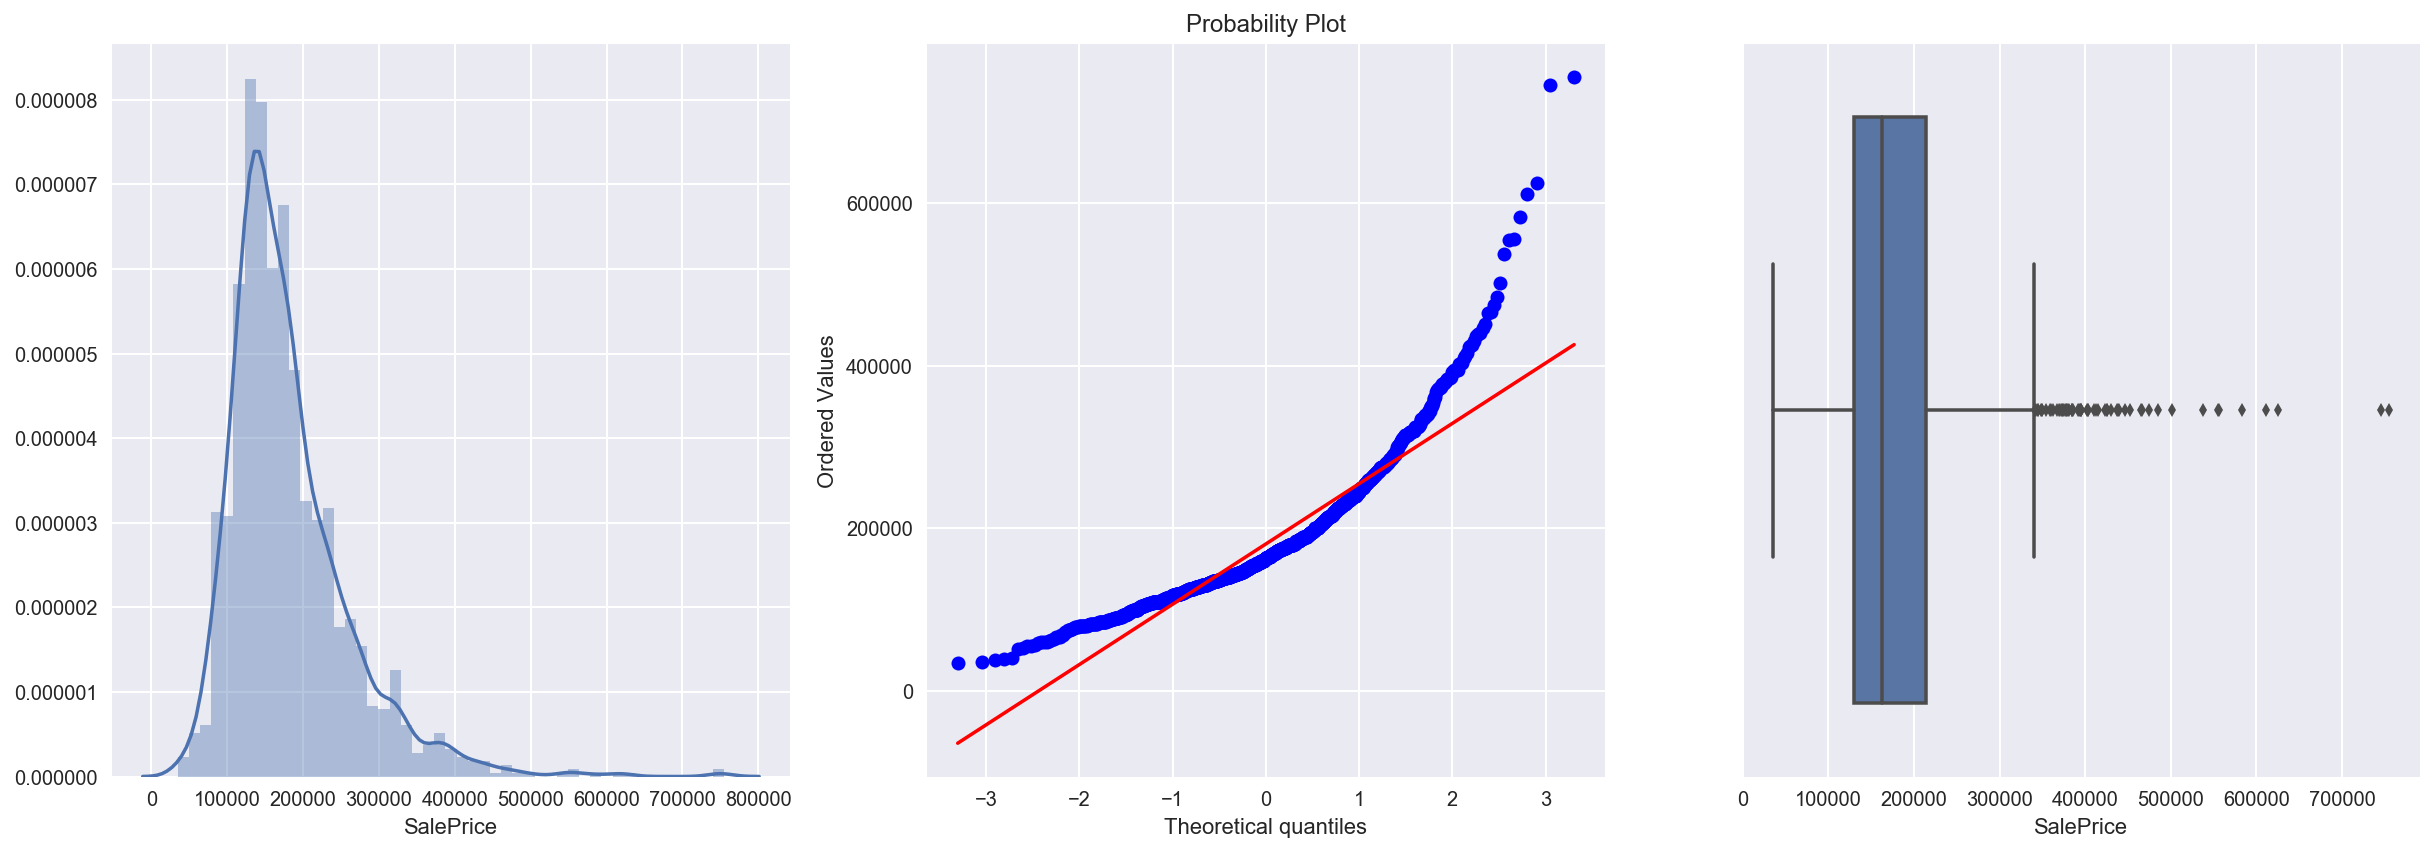

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Skewness: 1.882876
Kurtosis: 6.536282


In [5]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

print(train["SalePrice"].describe(),"\n")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

#### Comments :
1. SalePrice가 왼쪽으로 데이터가 쏠림을 확인할 수 잇음
2. QQ Plot을 통해 그래프가 휘어져있음을 확인하였고 추후 모델에 넣기 전에 정규화가 필요함
3. SalePrice의 이상치를 확인할 수 있으며, 추후 제거가 필요함

#### (5) 타겟 데이터의 정규화

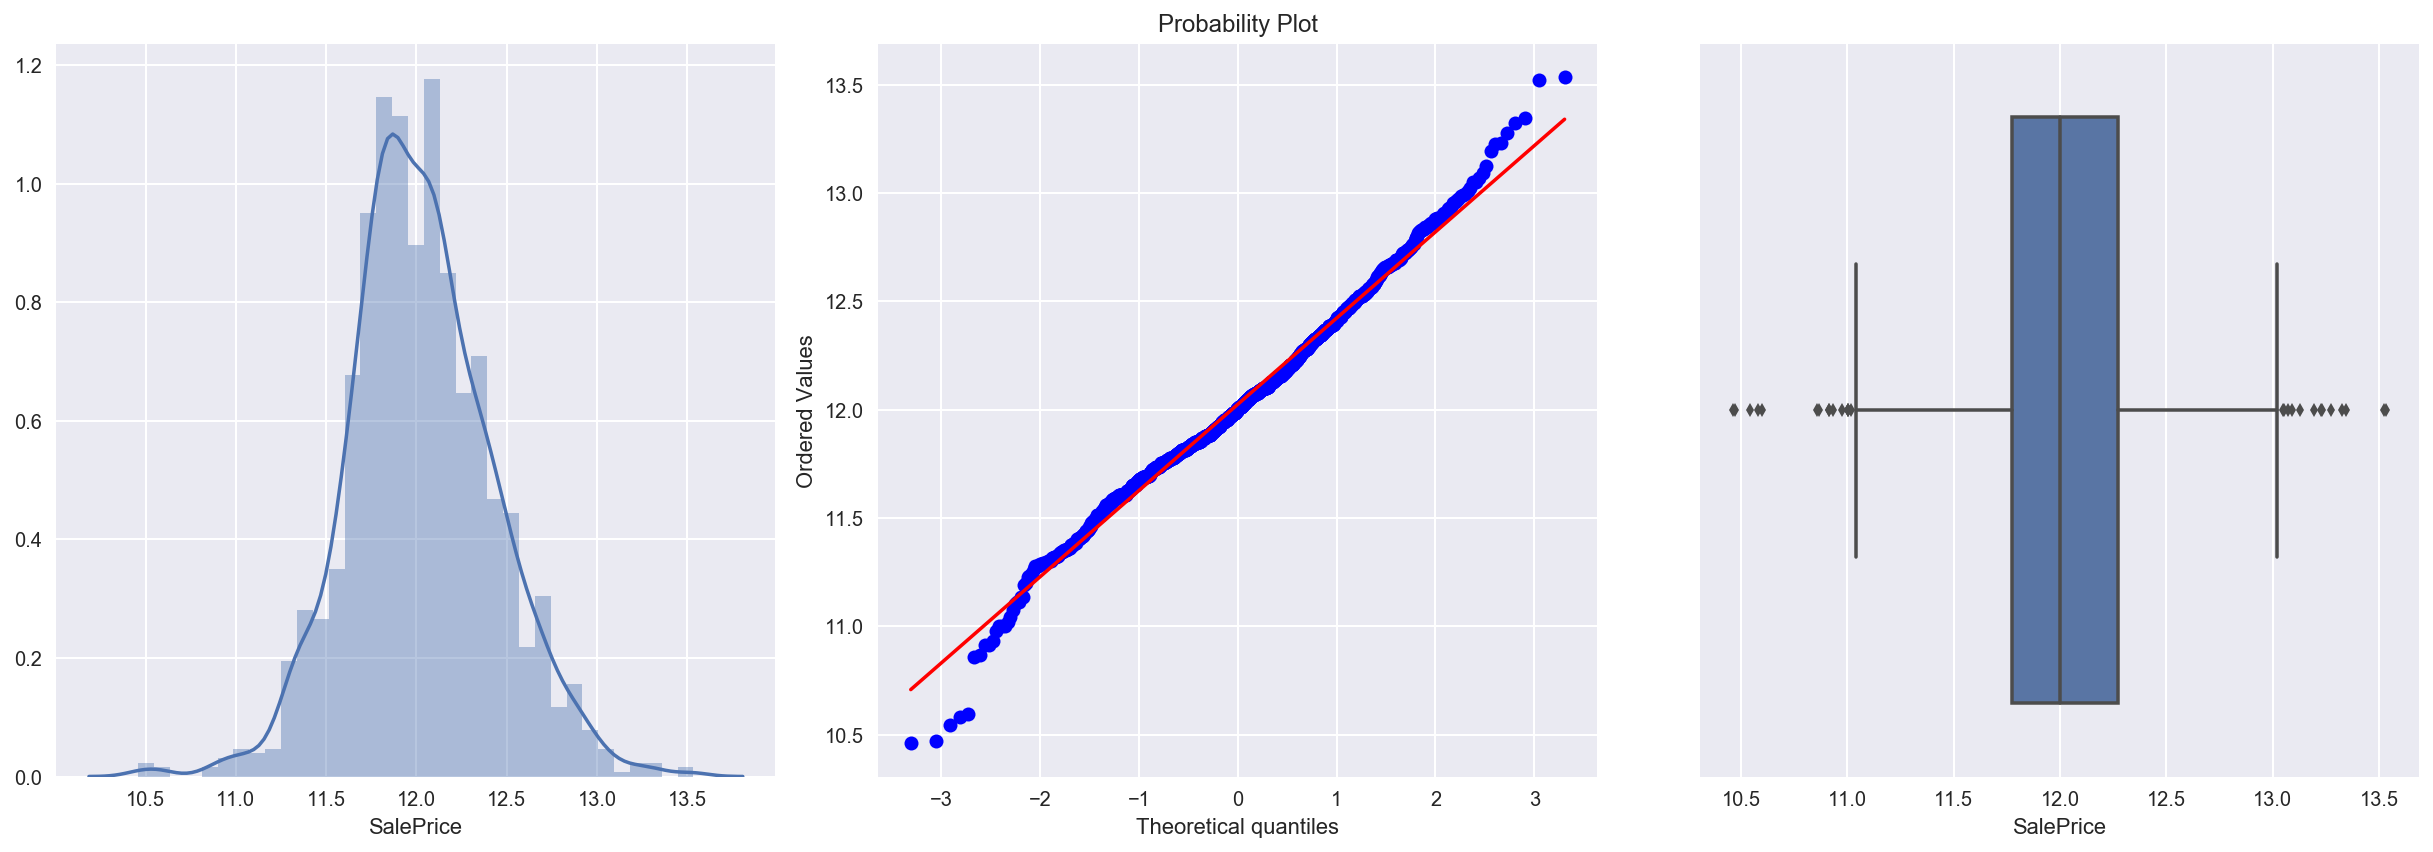

In [6]:
nomalized_SalePrice = np.log1p(train["SalePrice"])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(nomalized_SalePrice)

plt.subplot(132)
stats.probplot(nomalized_SalePrice, plot=plt)

plt.subplot(133)
sns.boxplot(nomalized_SalePrice)
plt.tight_layout()
plt.show()

#### Comment:
1. SalePrice를 정규한 후의 좌우 쏠림도 많이 줄어들고 정규성을 띄고 있음이 확인됨

### 1-2 Analysis the univariance

#### (1) Numeric 과 Catergoric 변수 분리

In [7]:
#MSSubClass 변수는 카테고리값이므로 숫자 데이터를 문자데이터로 수정 
train["MSSubClass"] = train["MSSubClass"].astype('str')

In [8]:
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [9]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 37 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 44 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC

#### (2) Numerical Features with SalePrice

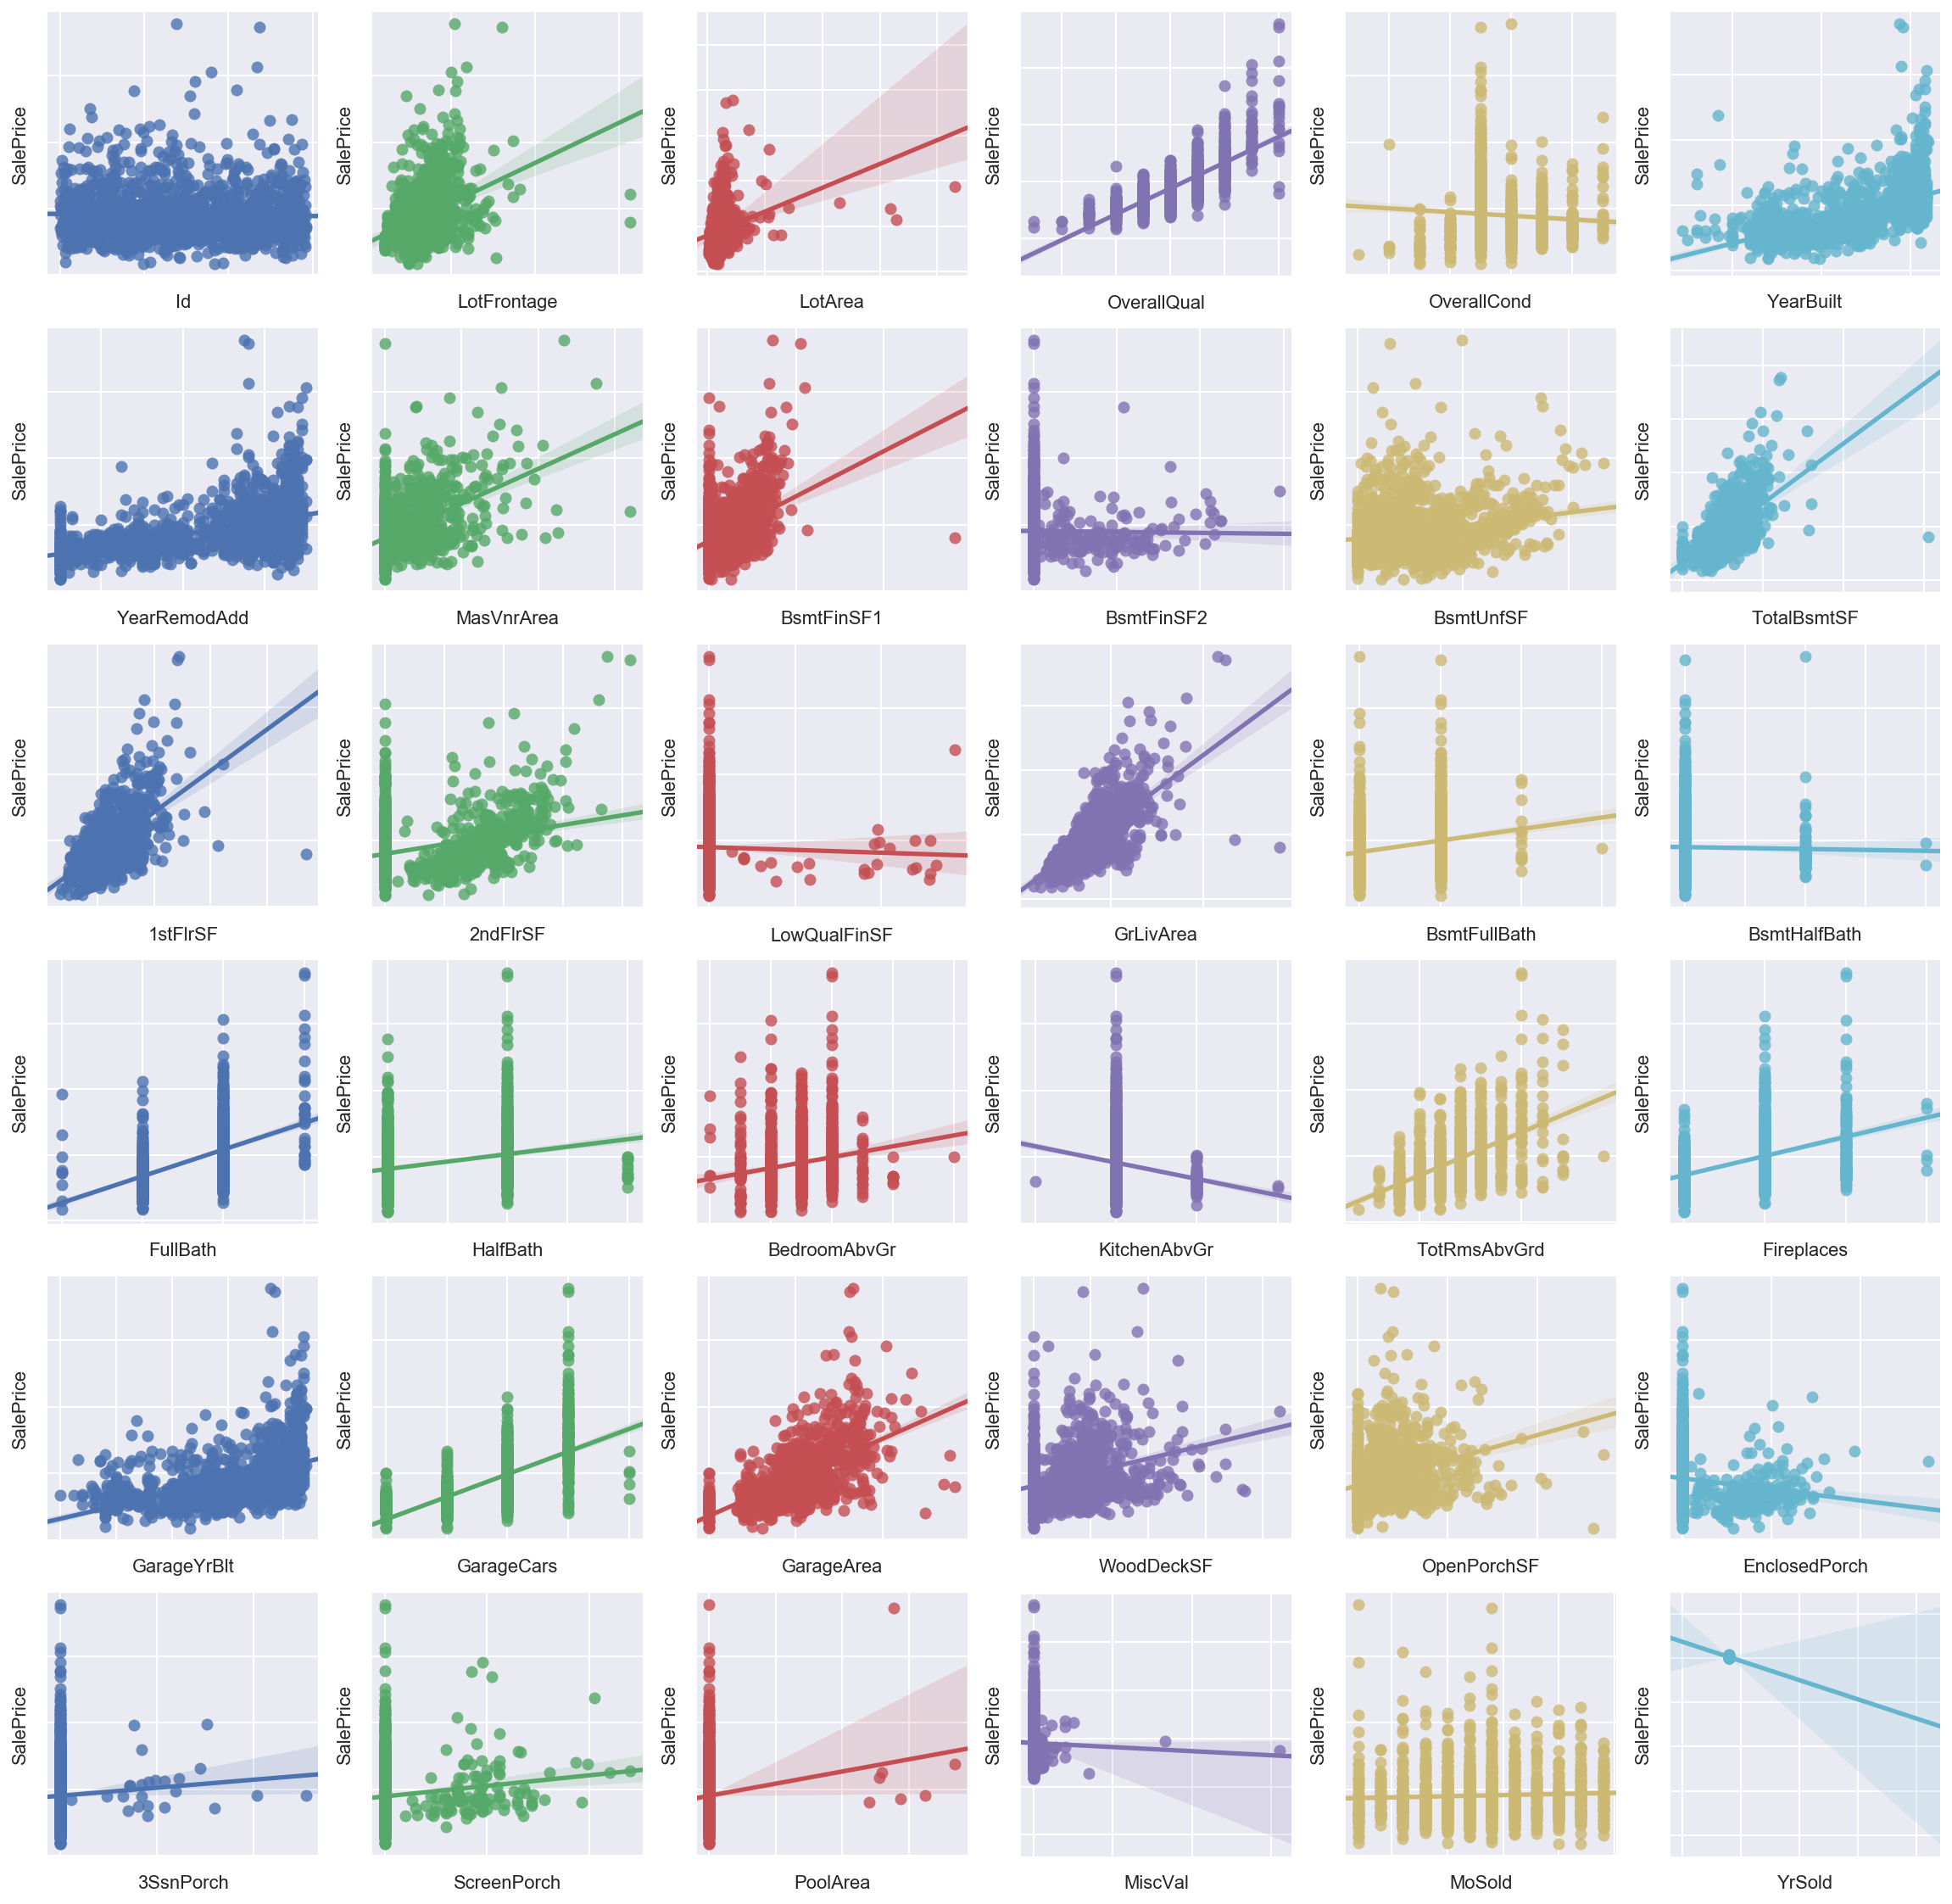

In [10]:
fig, ax = plt.subplots(6,6, figsize = (20,20))

for idx, n in enumerate(numerical_features):
    if n == 'SalePrice':
        continue
    sns.regplot(x=n, y='SalePrice', data=train, ax = ax[idx//6,idx%6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    ax[idx//6, idx % 6].set(xticklabels=[])
    
    continue   

#### (3) Categorical Features with SalePrice

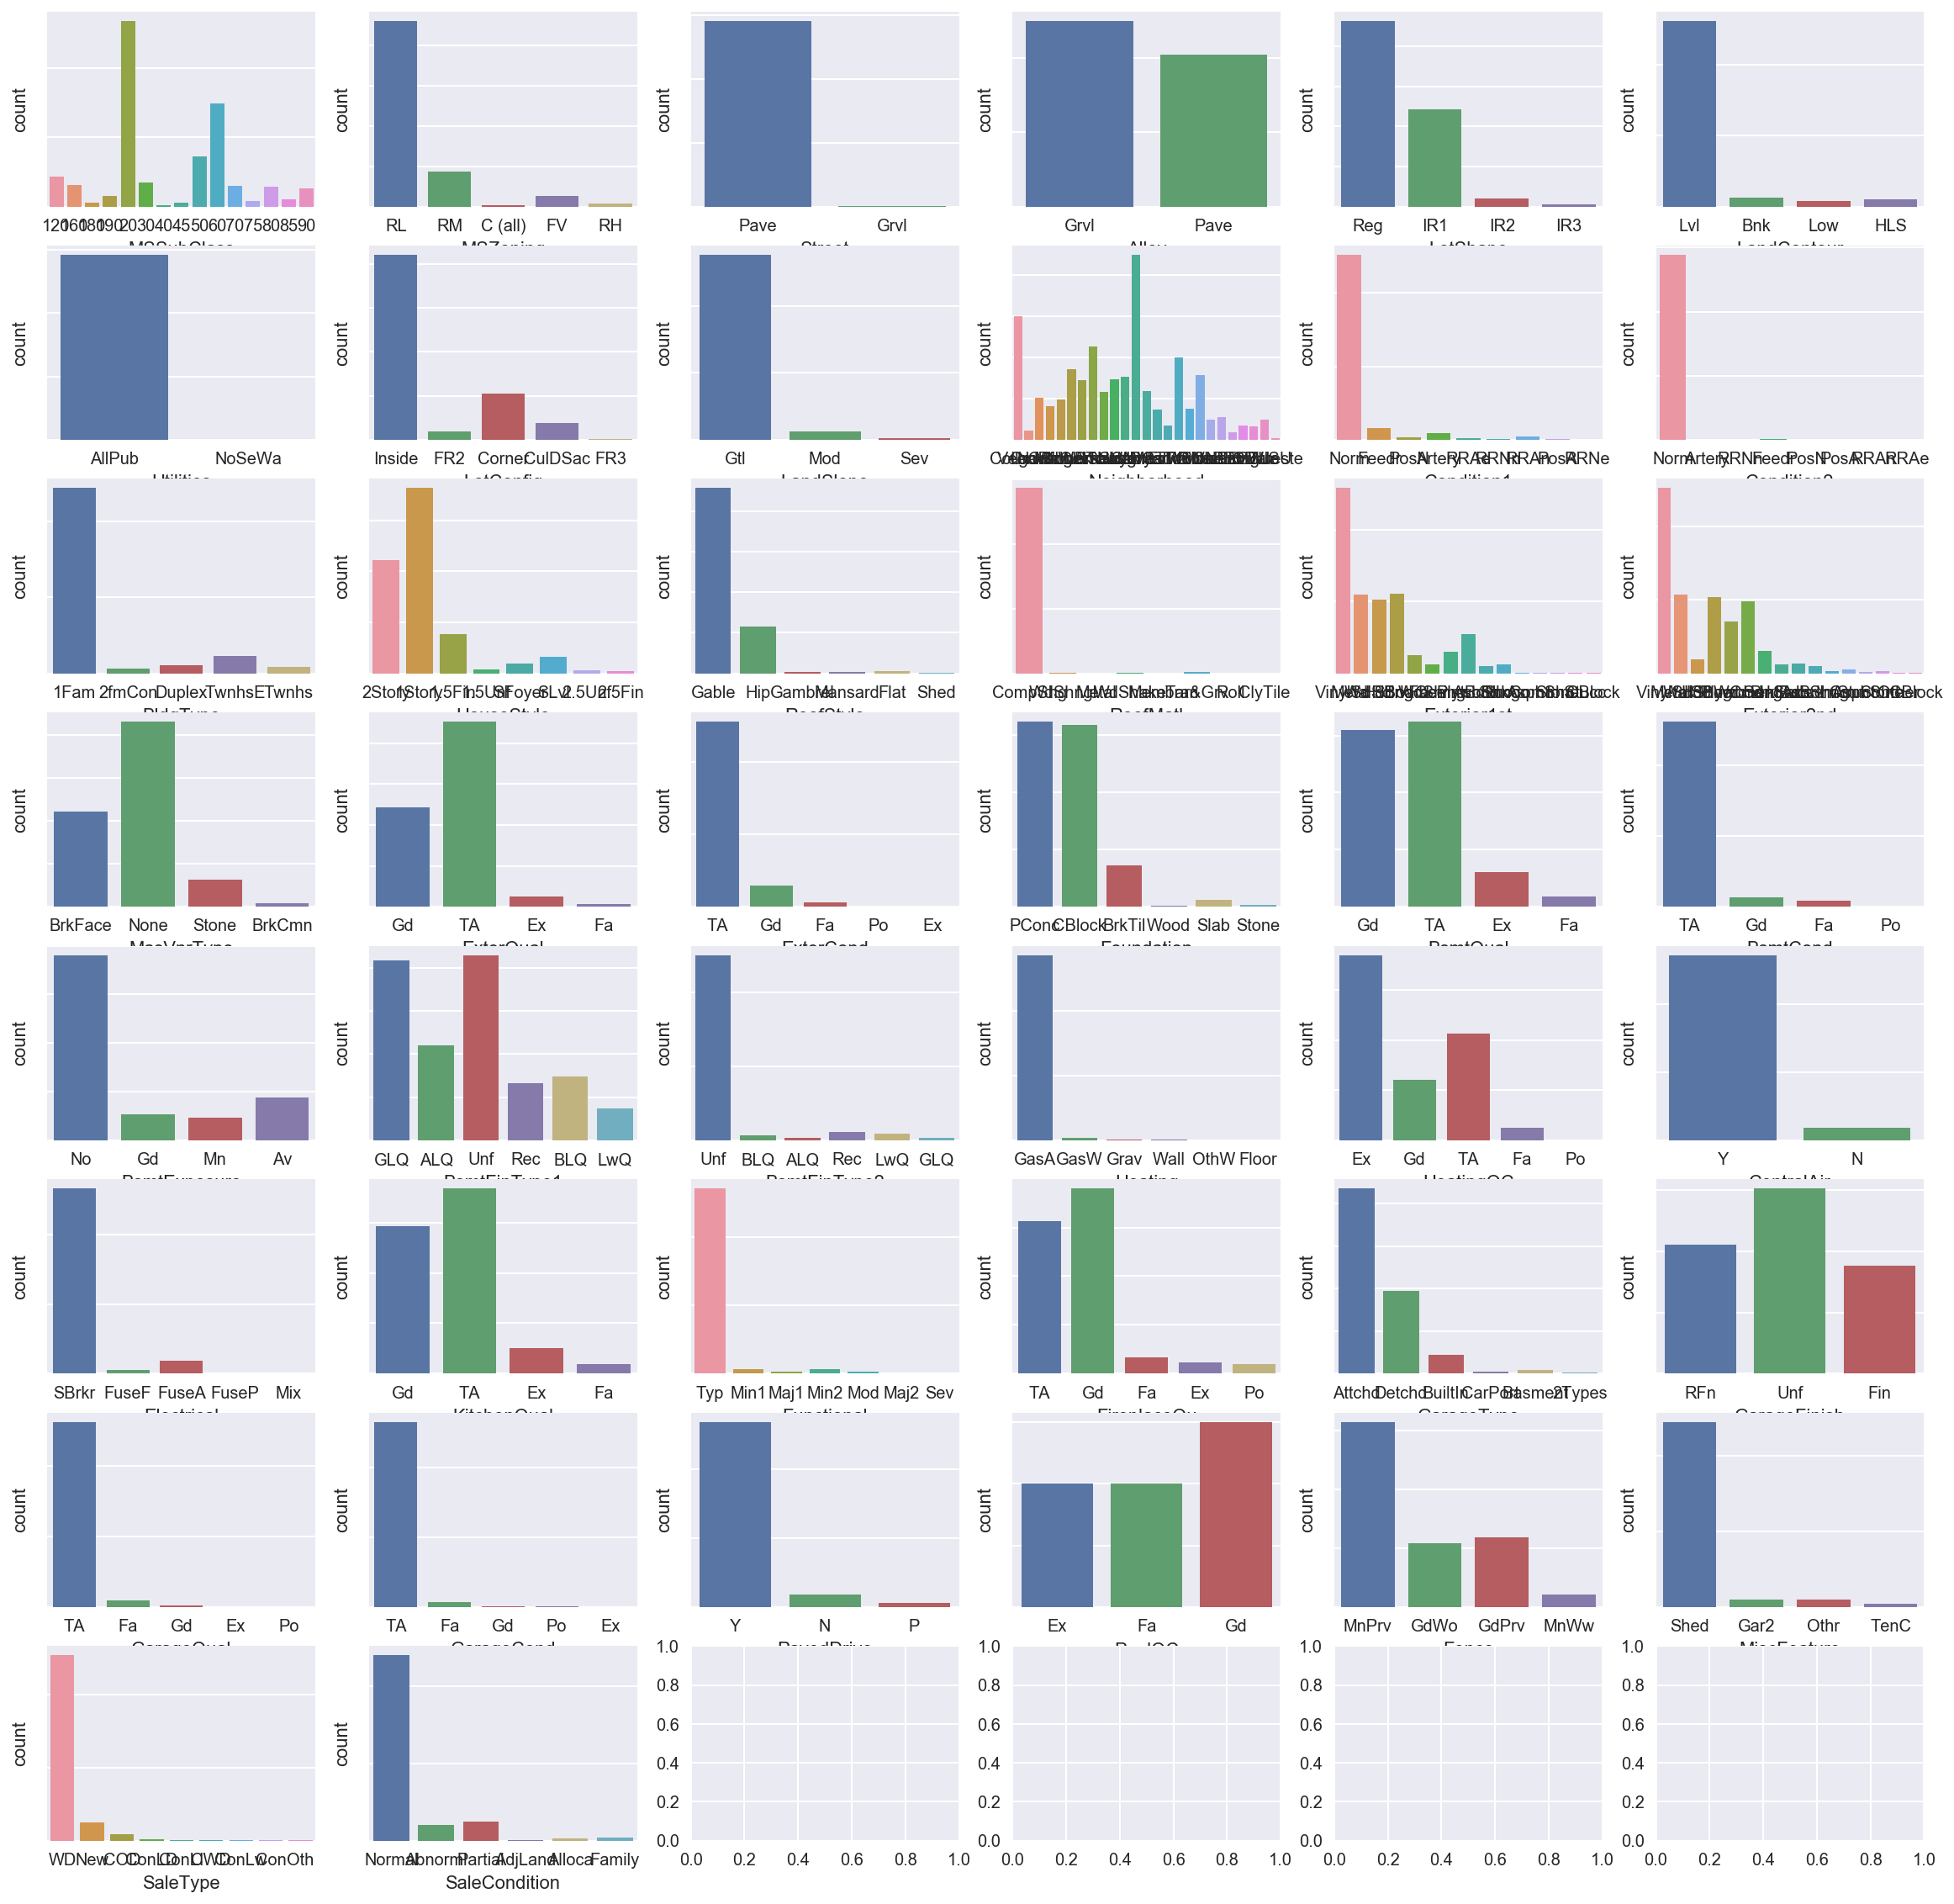

In [11]:
fig, ax = plt.subplots(8,6, figsize = (20,20))

for idx, n in enumerate(categorical_features):
    
    sns.countplot(x=n, data=train, ax = ax[idx//6, idx % 6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    
    continue   

### 1-3 타겟 데이터(SalePrice)와 변수들 간의 관계

#### 1-3-1 거실 넓이와  이층 & 베이스먼트 여부

In [12]:
#train를 카피해서 새로 df_train만든후 2층과 베이스먼트 여부를 확인 
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

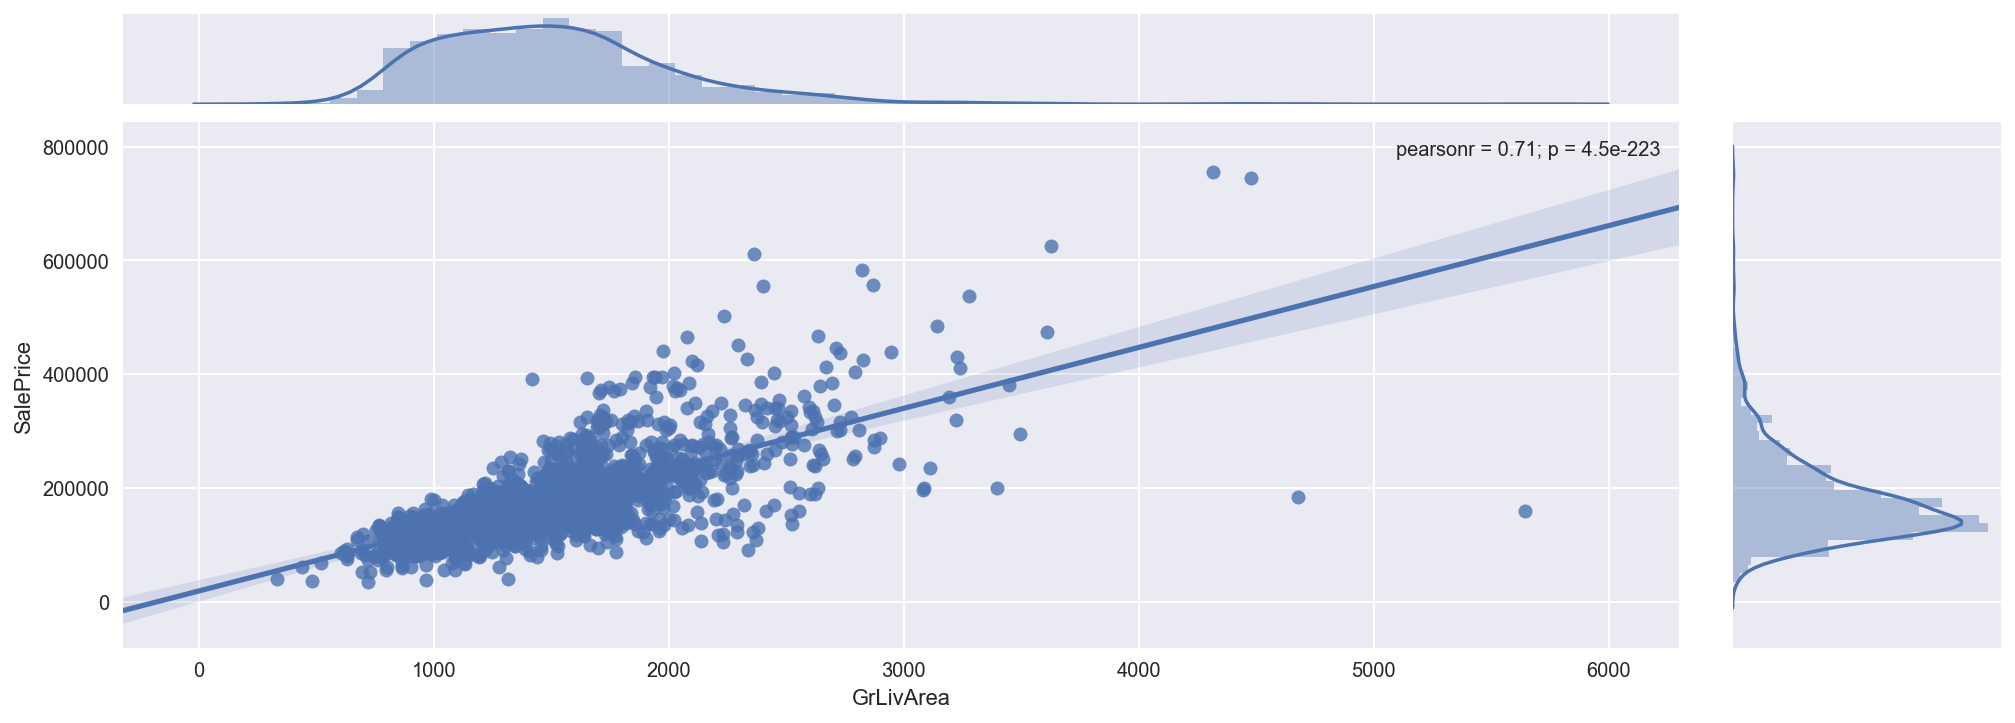

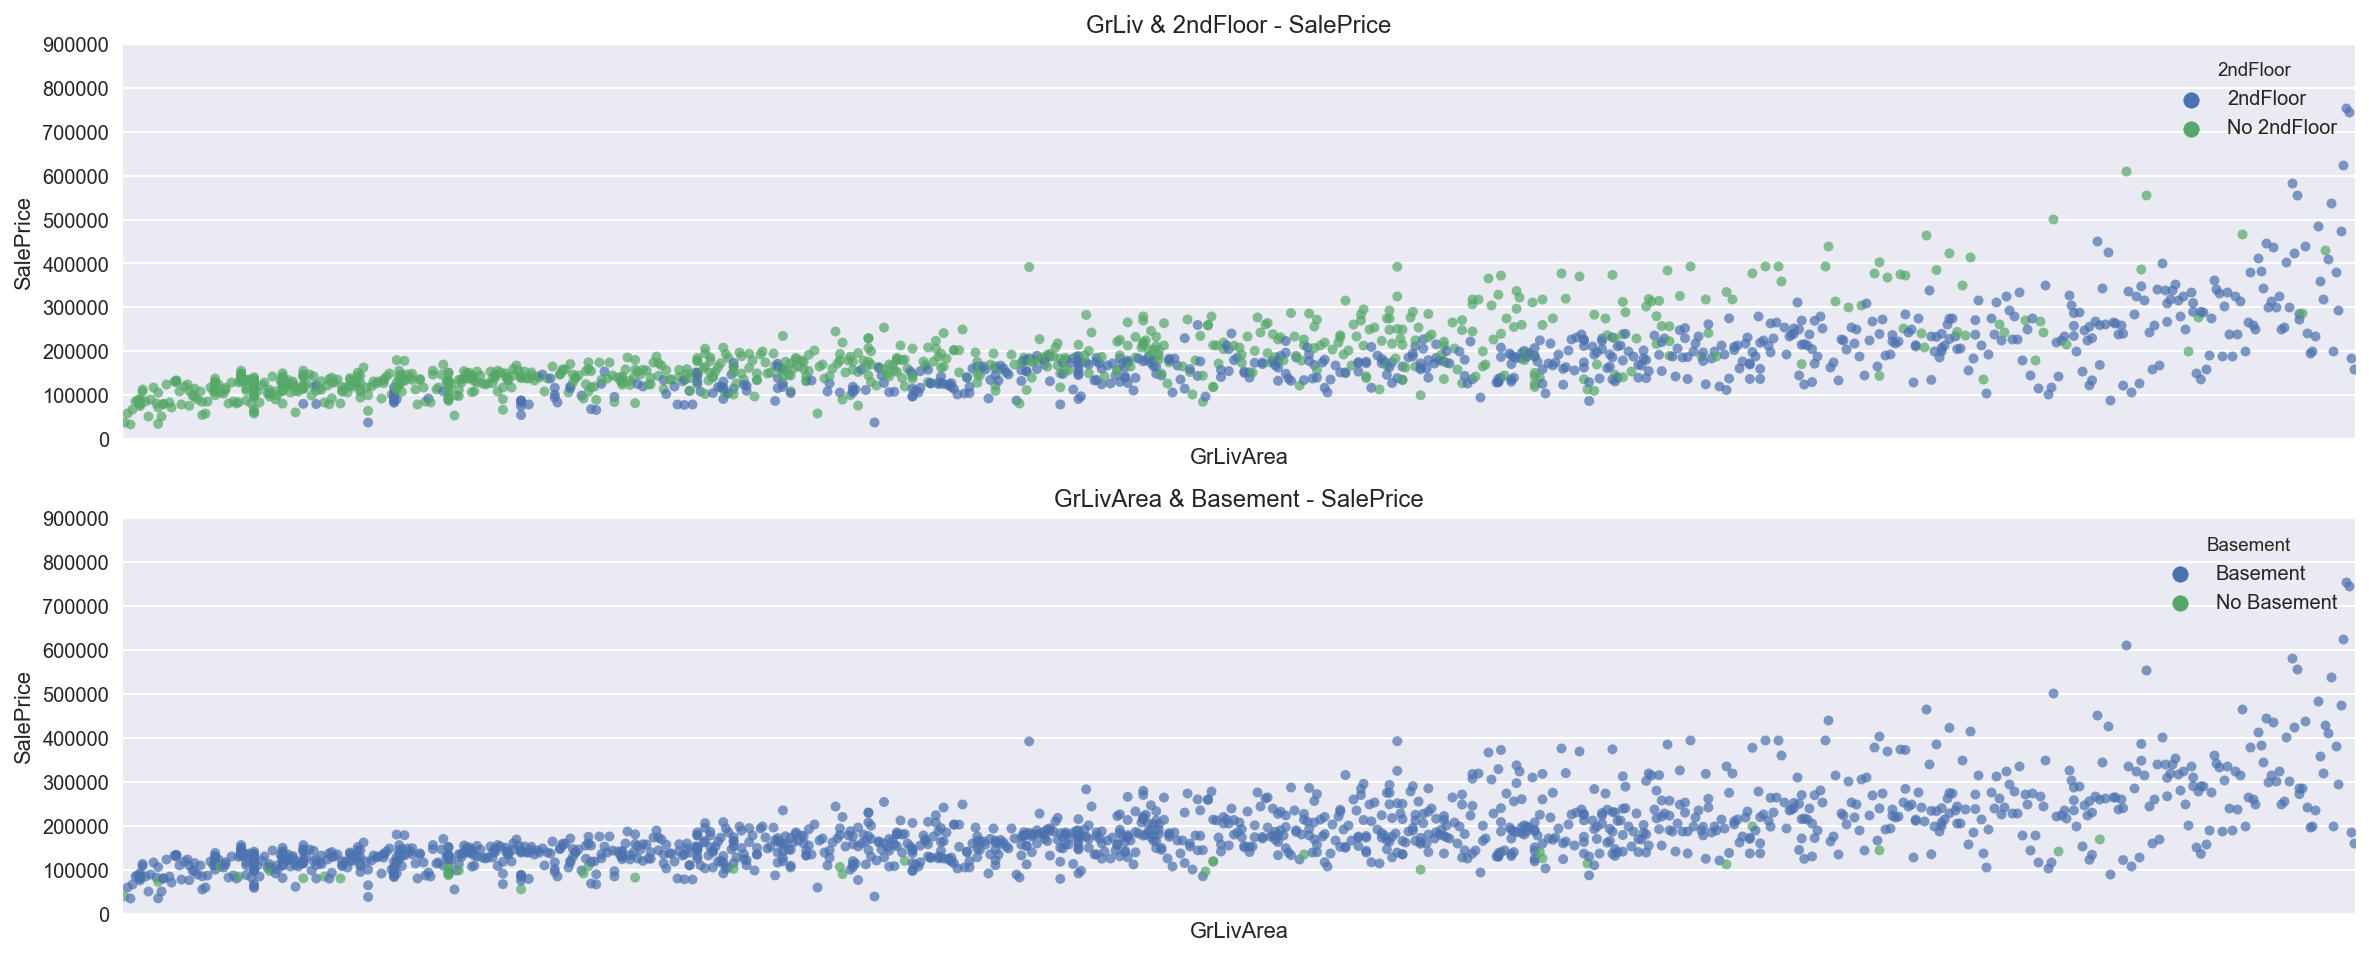

In [13]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

plt.figure(figsize = (20,8))
plt.subplot(211)
g = sns.stripplot(x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,900000)
g.set_xticks([])
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(212)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_ylim(0,900000)
b.set_title('GrLivArea & Basement - SalePrice')
b.set_xticks([])

plt.show()

#### Comments : 
1. GrLivArea는 집값에 선형관계이며, 이분산성을 갖고 있음

2. 집값이 약 20만불 이상일 경우, 2층집이 더 많으며, 베이스먼트가 없는 집들이 없음

#### 1-3-2 집의 품질과 컨디션 

Text(0.5,1,'OverallCond - SalePrice')

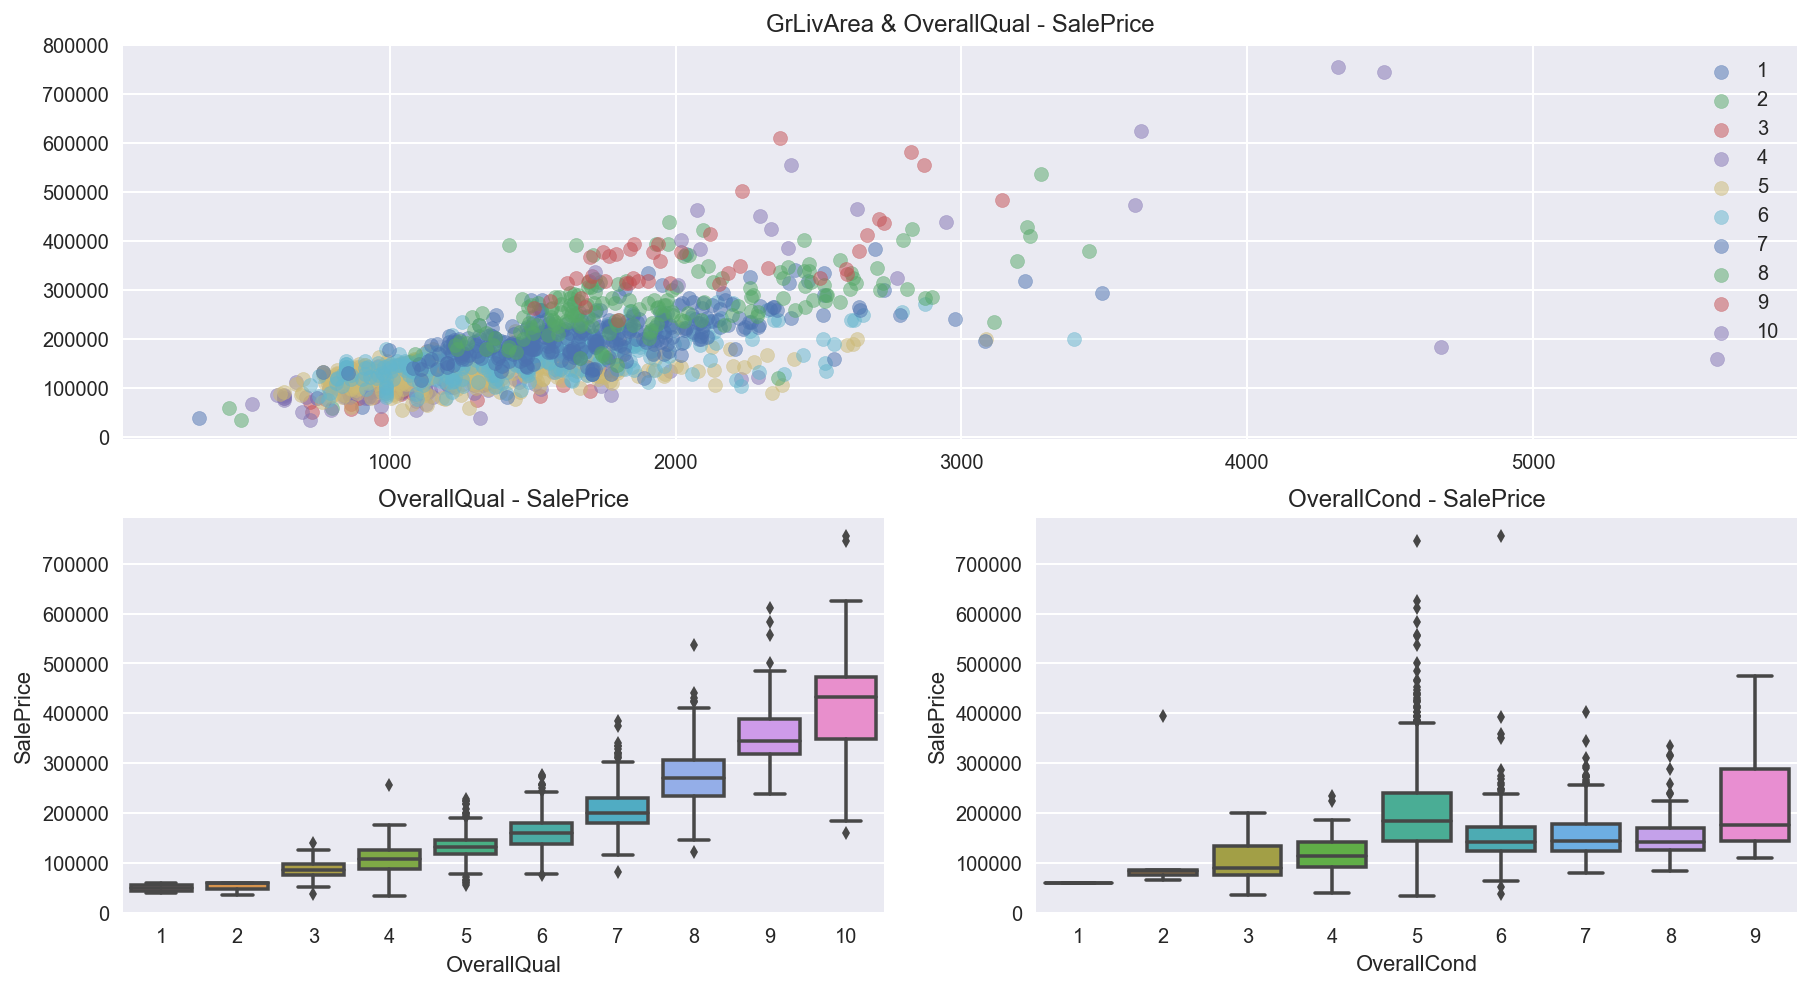

In [14]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,11):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")
ax1.set_xlabel('GrLivArea & OverallQual')
ax1.set_ylabel('SalePrice')


ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

#### Comments :

1. 집의 품질평가가 좋을수록 집값은 높아진다는 선형관계를 발견할 수 있었으나 overall condition과 집값 사이의 관계는 거의 없는 것을 발견

2. 두 항목 모두 1은 Very Poor 이며, 10은 Very Excellent 값을 갖음

#### 1-3-3 GarageArea & GarageCars

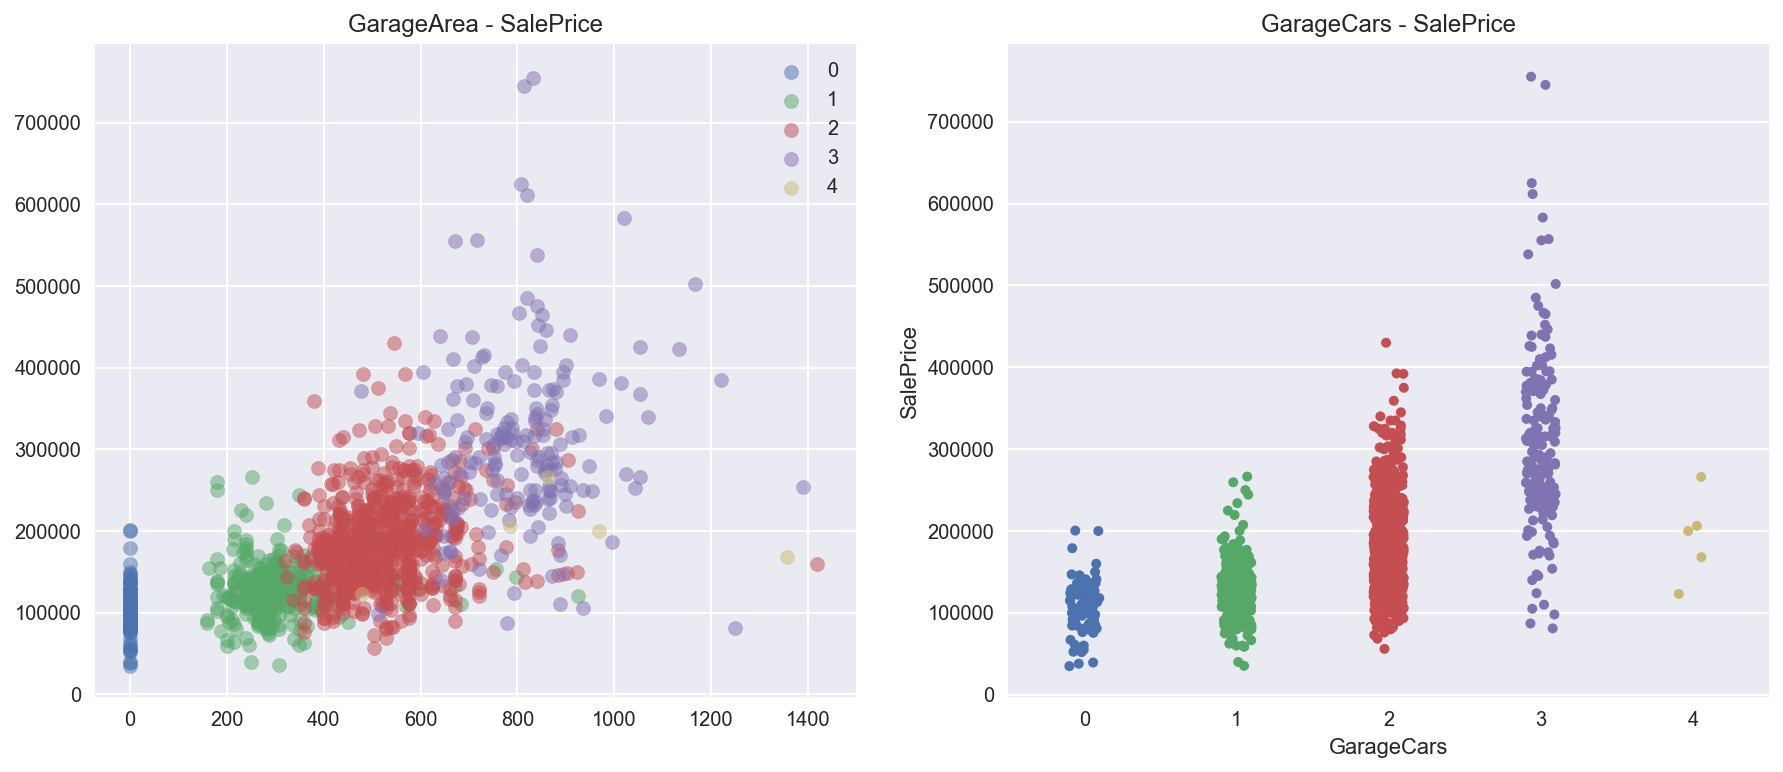

In [15]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

ax1.legend()
ax1.set_title('GarageArea - SalePrice')
ax1.set_xlabel('GarageArea')
ax1.set_ylabel('SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

#### Comments:
1. 집값이 높을수록 GarageArea가 넓어지고 창고에 넣을 수 있는 자동차 대수(GarageCars)도 많아지는것을 알 수 있음

#### 1-3-4 이웃

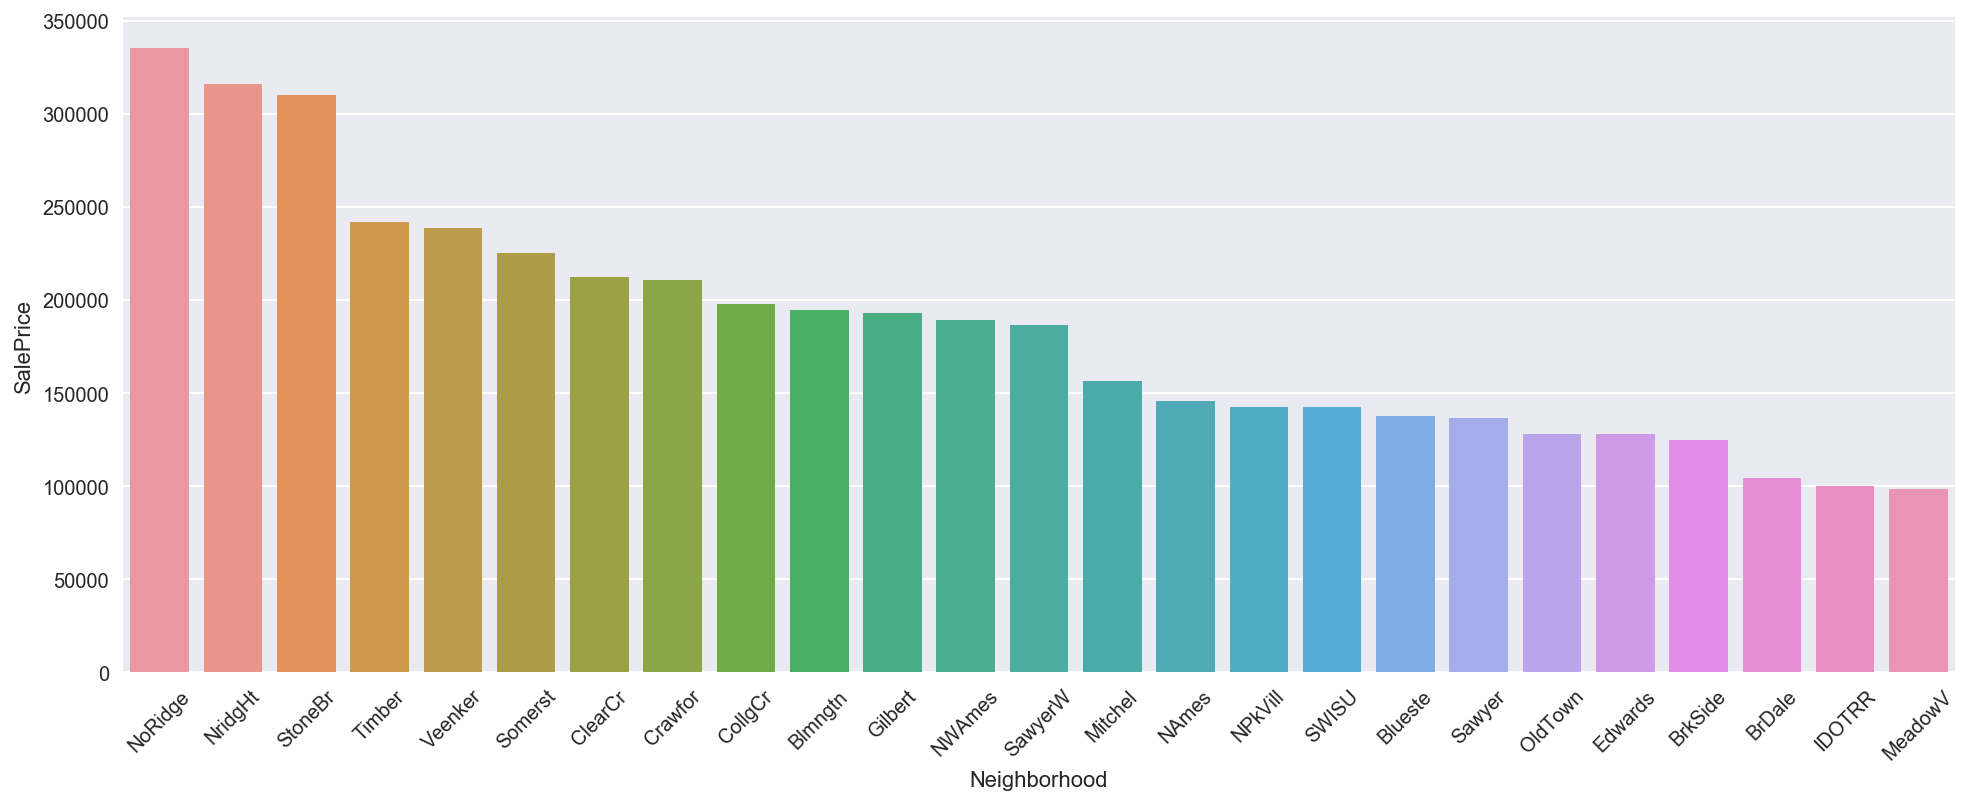

In [16]:
#Neighborhood 변수를 각 이웃별로 그룹화 한 후에 평균으로 집계
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

#평균으로 집계된 자료를 bar그래프로 가격이 높은 순에서 낮은 순으로 나열
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [17]:
#집값이 25만 이상을 High_price_neighbor, 25만 ~ 15만 사이의 이웃을 Middle_price_neighbor, 나머지 이웃을 Low_price_neighbor로 구분
def neighbor_level(x):
    High_price_neighbor = ['NoRidge','NridgHt','StoneBr'] 
    Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
    Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']
    
    if str(x) in High_price_neighbor:
        return "high"
    elif str(x) in Middle_price_neighbor:
        return "middle"
    elif str(x) in Low_price_neighbor:
        return "low"
    
df_train["neighbor_level"] = df_train["Neighborhood"].apply(neighbor_level)

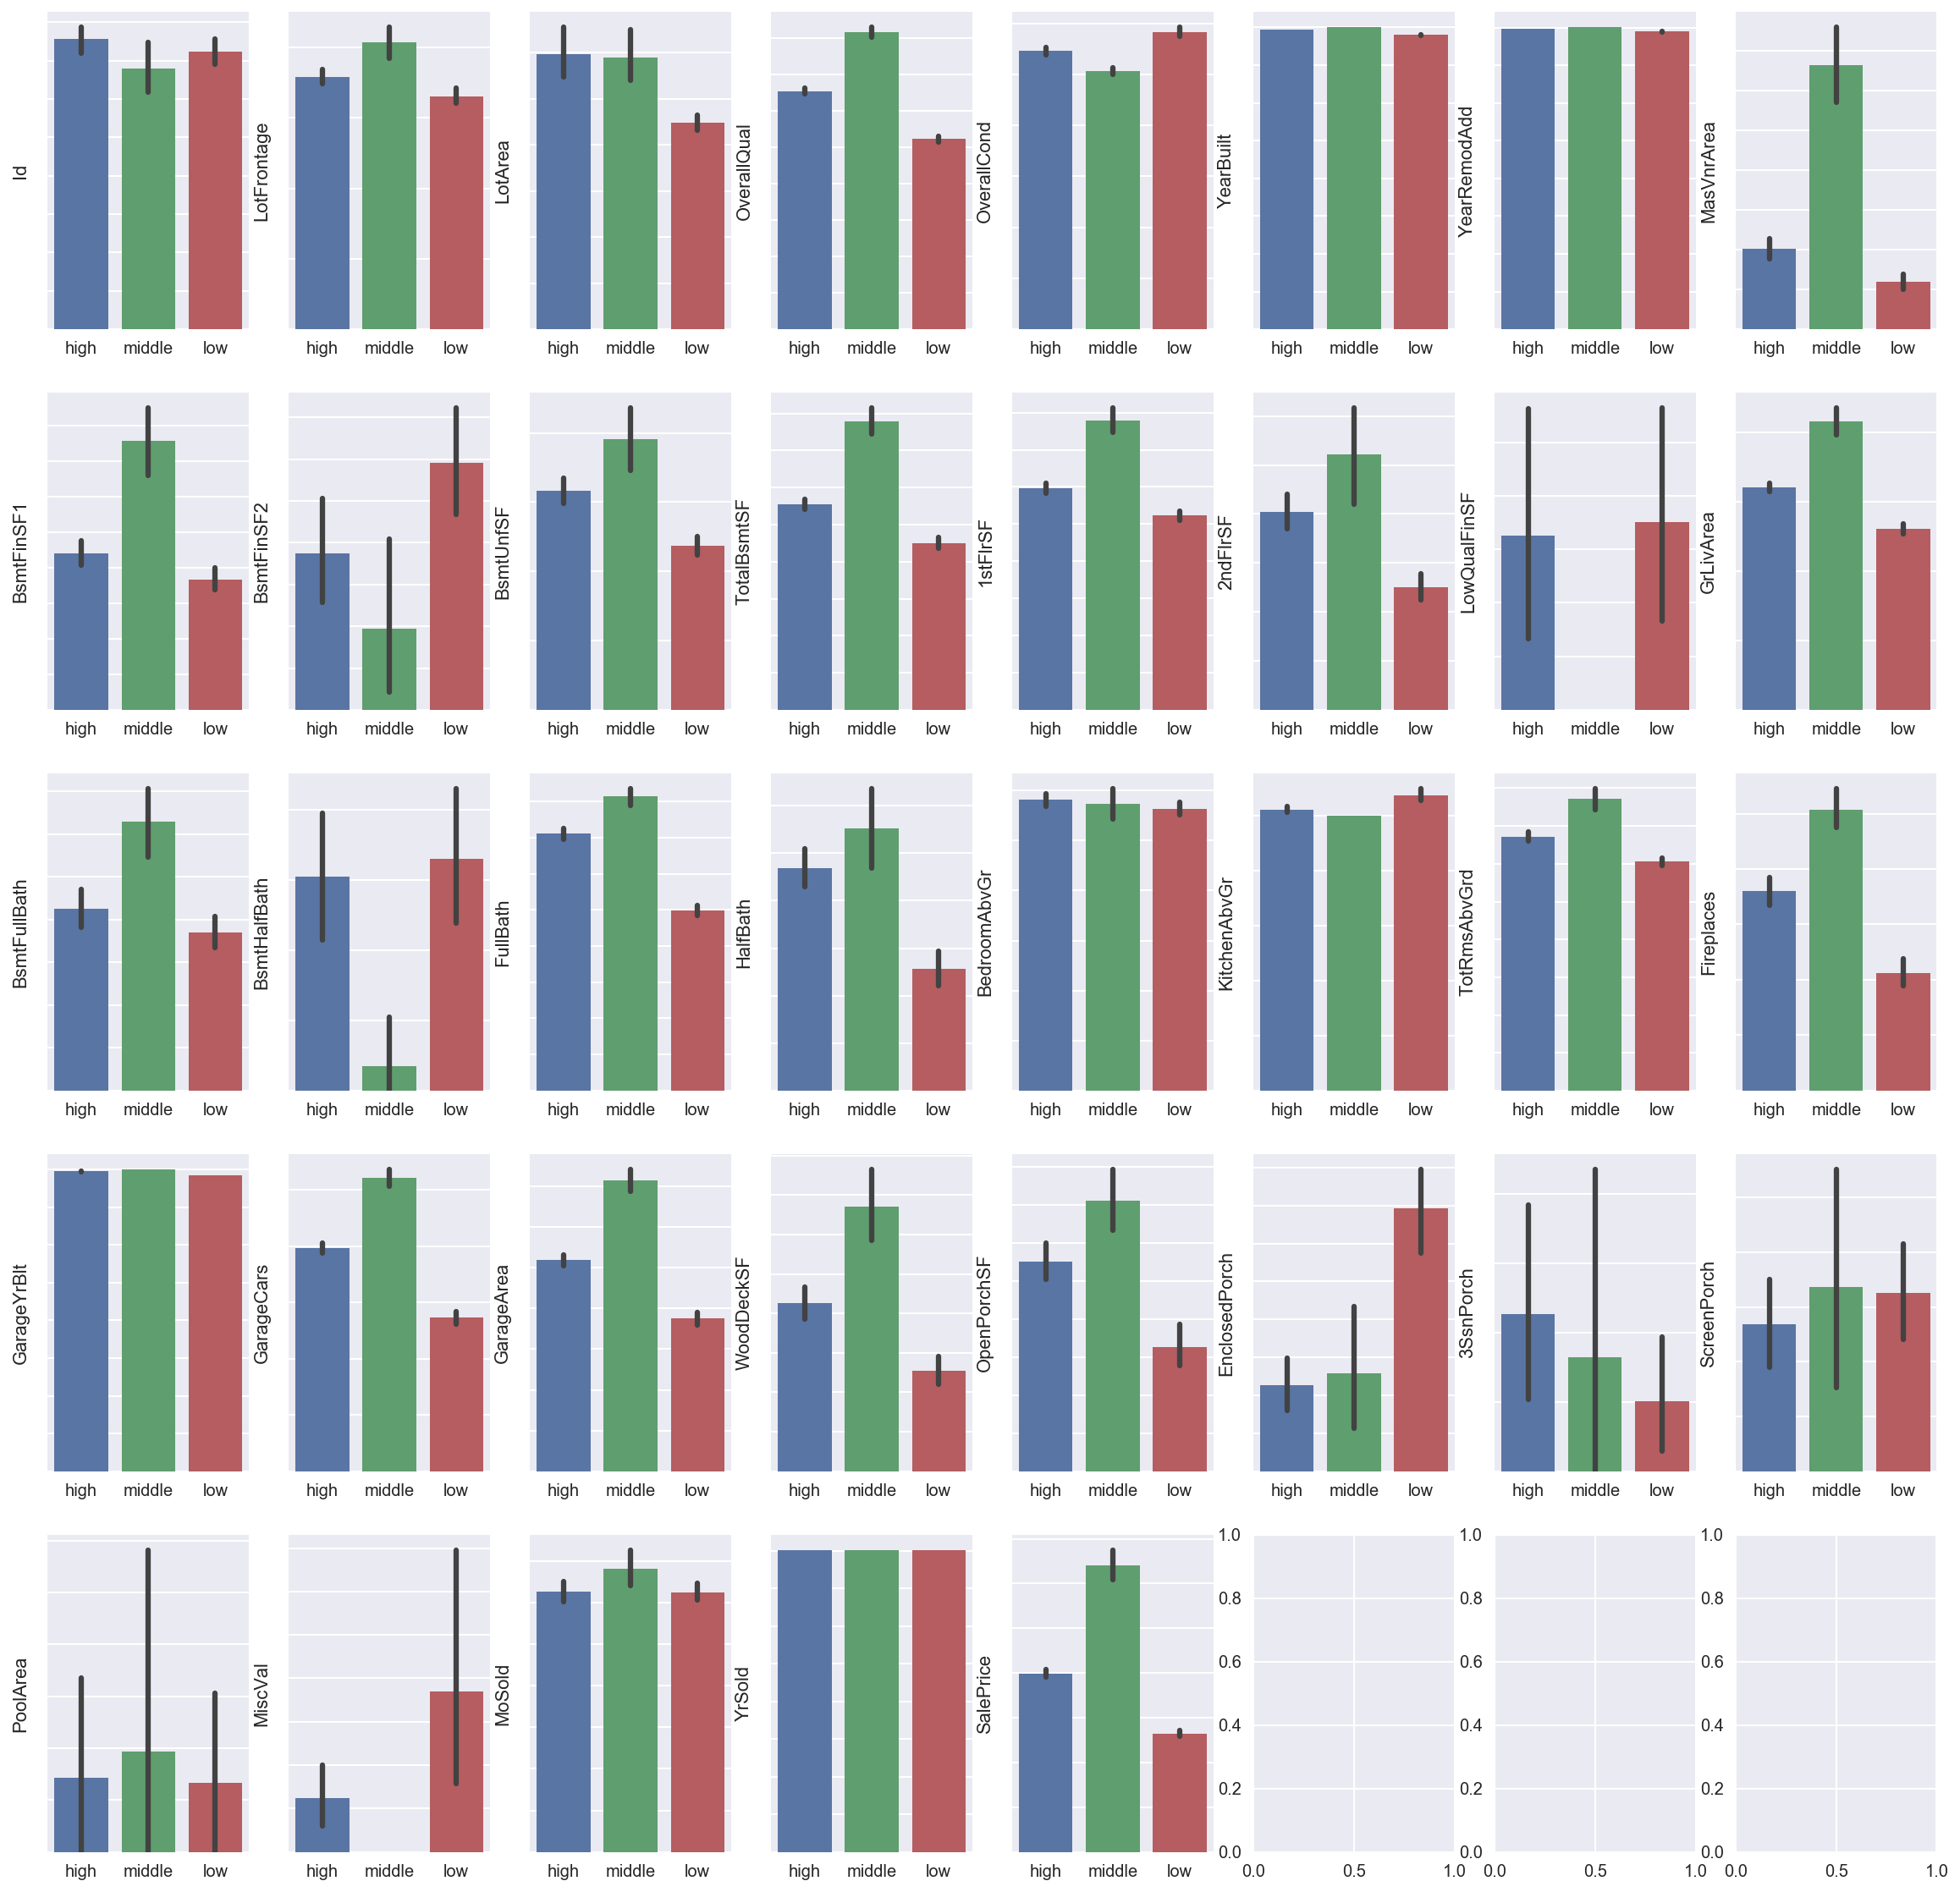

In [18]:
fig, ax = plt.subplots(5,8, figsize = (20,20))

for idx, n in enumerate(numerical_features):

    sns.barplot(x="neighbor_level", y= n, data=df_train, ax = ax[idx//8,idx%8])
    ax[idx//8, idx % 8].set(yticklabels=[])
    ax[idx//8, idx % 8].set(xticklabels=["high","middle","low"])
    ax[idx//8, idx % 8].set_xlabel("")
    ax[idx//8, idx % 8].set_ylabel(n)
    continue  

#### Comments:
1. Overall Quality (집의 품질), GrLivArea (거실 크기)등이 high level보다 middle level이 평균적으로 높고 넓은데 것에 대해서 집의 크기와 품질과 상관없는 어느 동네에 속해 있는지가 집값에 영향을 줄 수 있음을 확인

2. 다양한 항목들 간에 그룹의 특성이 나타나 있음을 확인할 수 있으며, 추후 집값 예측할때 Neighborhood을 사용할 예정임

#### 1-3-4 연도

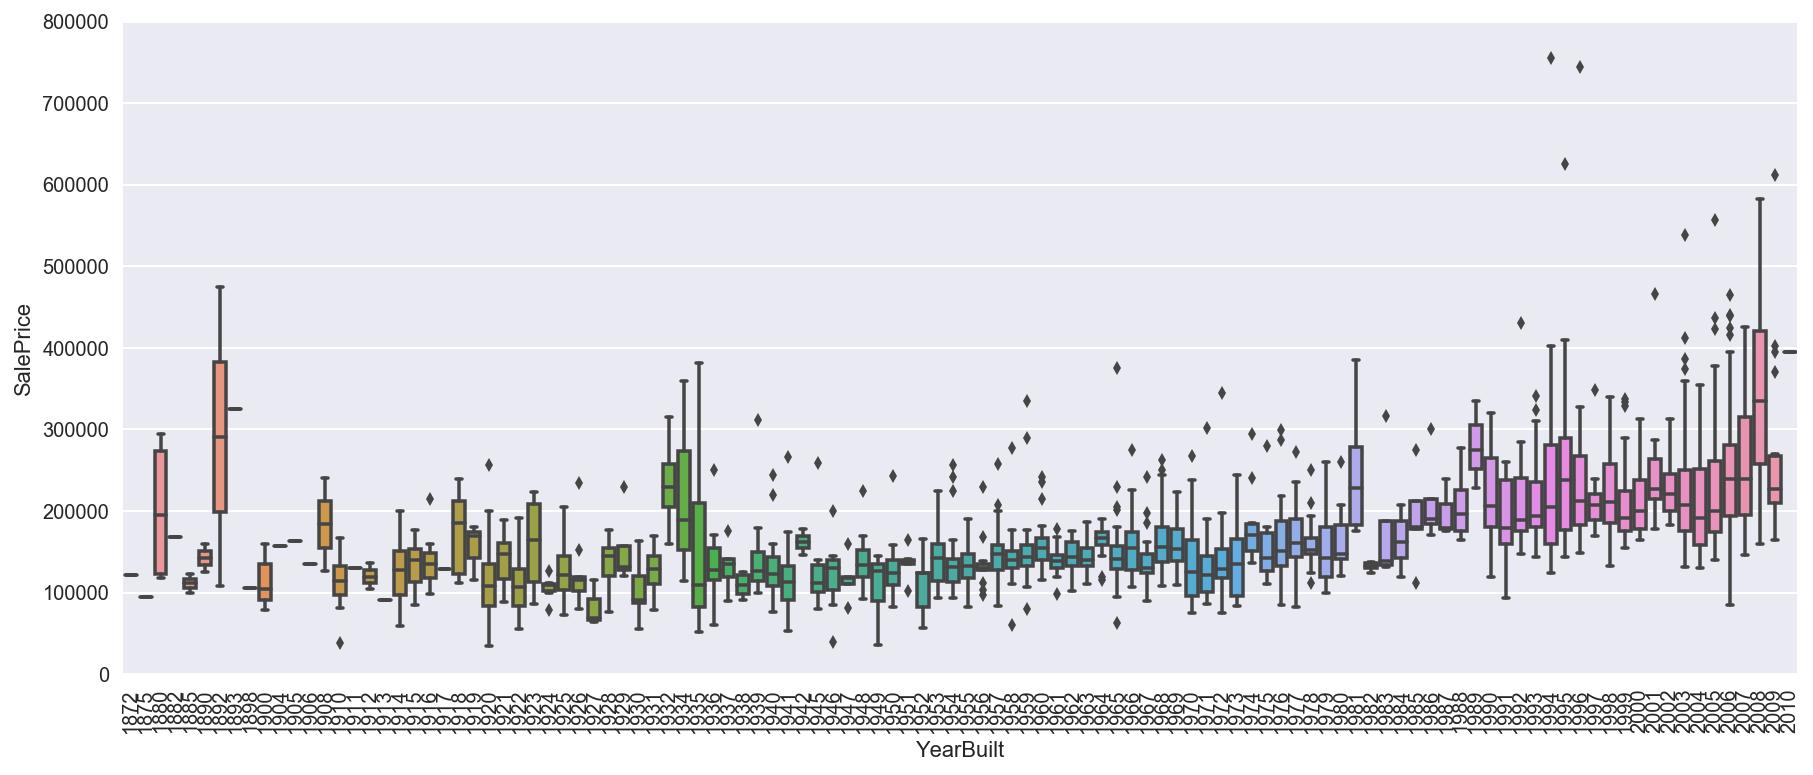

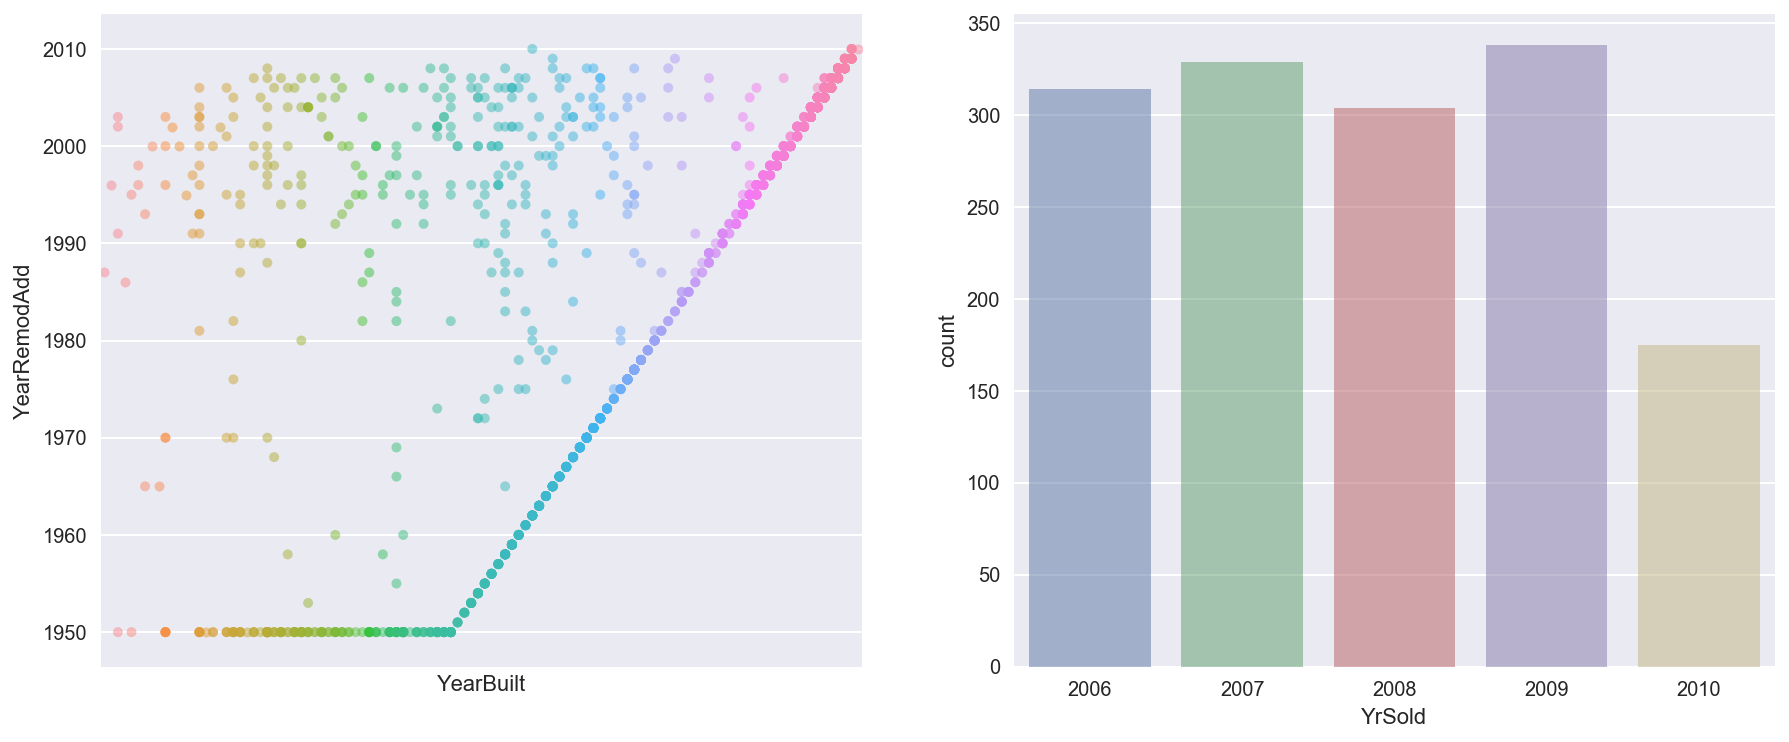

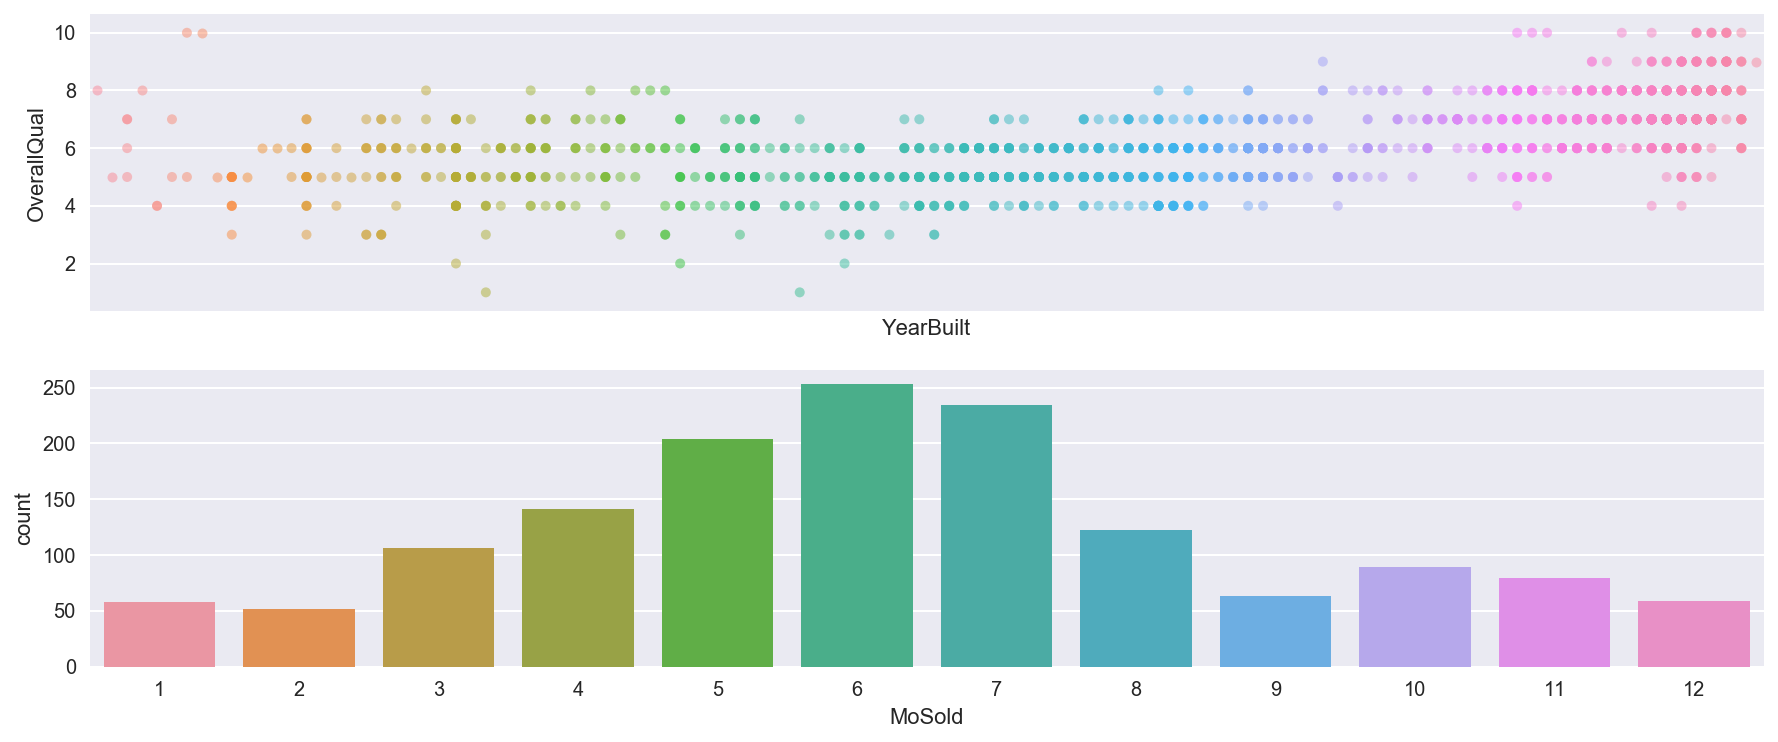

In [19]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
sns.stripplot(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5,ax=ax2)
ax2.legend()
ax2.set_xticks([])
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')

ax3 = plt.subplot(1,2,2)
sns.countplot(x = train['YrSold'], alpha = 0.5, ax=ax3)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5,ax=ax4)
ax4.legend()
ax4.set_xticks([])
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')

ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

#### Comments :

1. 1950년대 이후로 지어진 집부터는 대체로 최근에 지어진 집의 가격이 높음을 알 수 있음.
2. 아직 리모델링이 되지 않은 집은 만들어진 년도와 같은 년도로 기록되어 있음.
3. 리모델링은 1950년도 이후에 시행되었으며 오래된 집들은 대부분 1950년도에 리모델링 되었다고 기록되어 있음.
4. 매매년도는 2006년부터 2010년까지의 기록으로 되어있으며, 2009년에 매매가 가장 많음.
5. OverallQual이 8-10인 집은 대체로 1980년도 이후에 지어진 집임.
6. 날이 따뜻한 5, 6, 7월에 가장 매매가 활발하게 이루어짐.

### 1-3-5 화로의 갯수와 품질

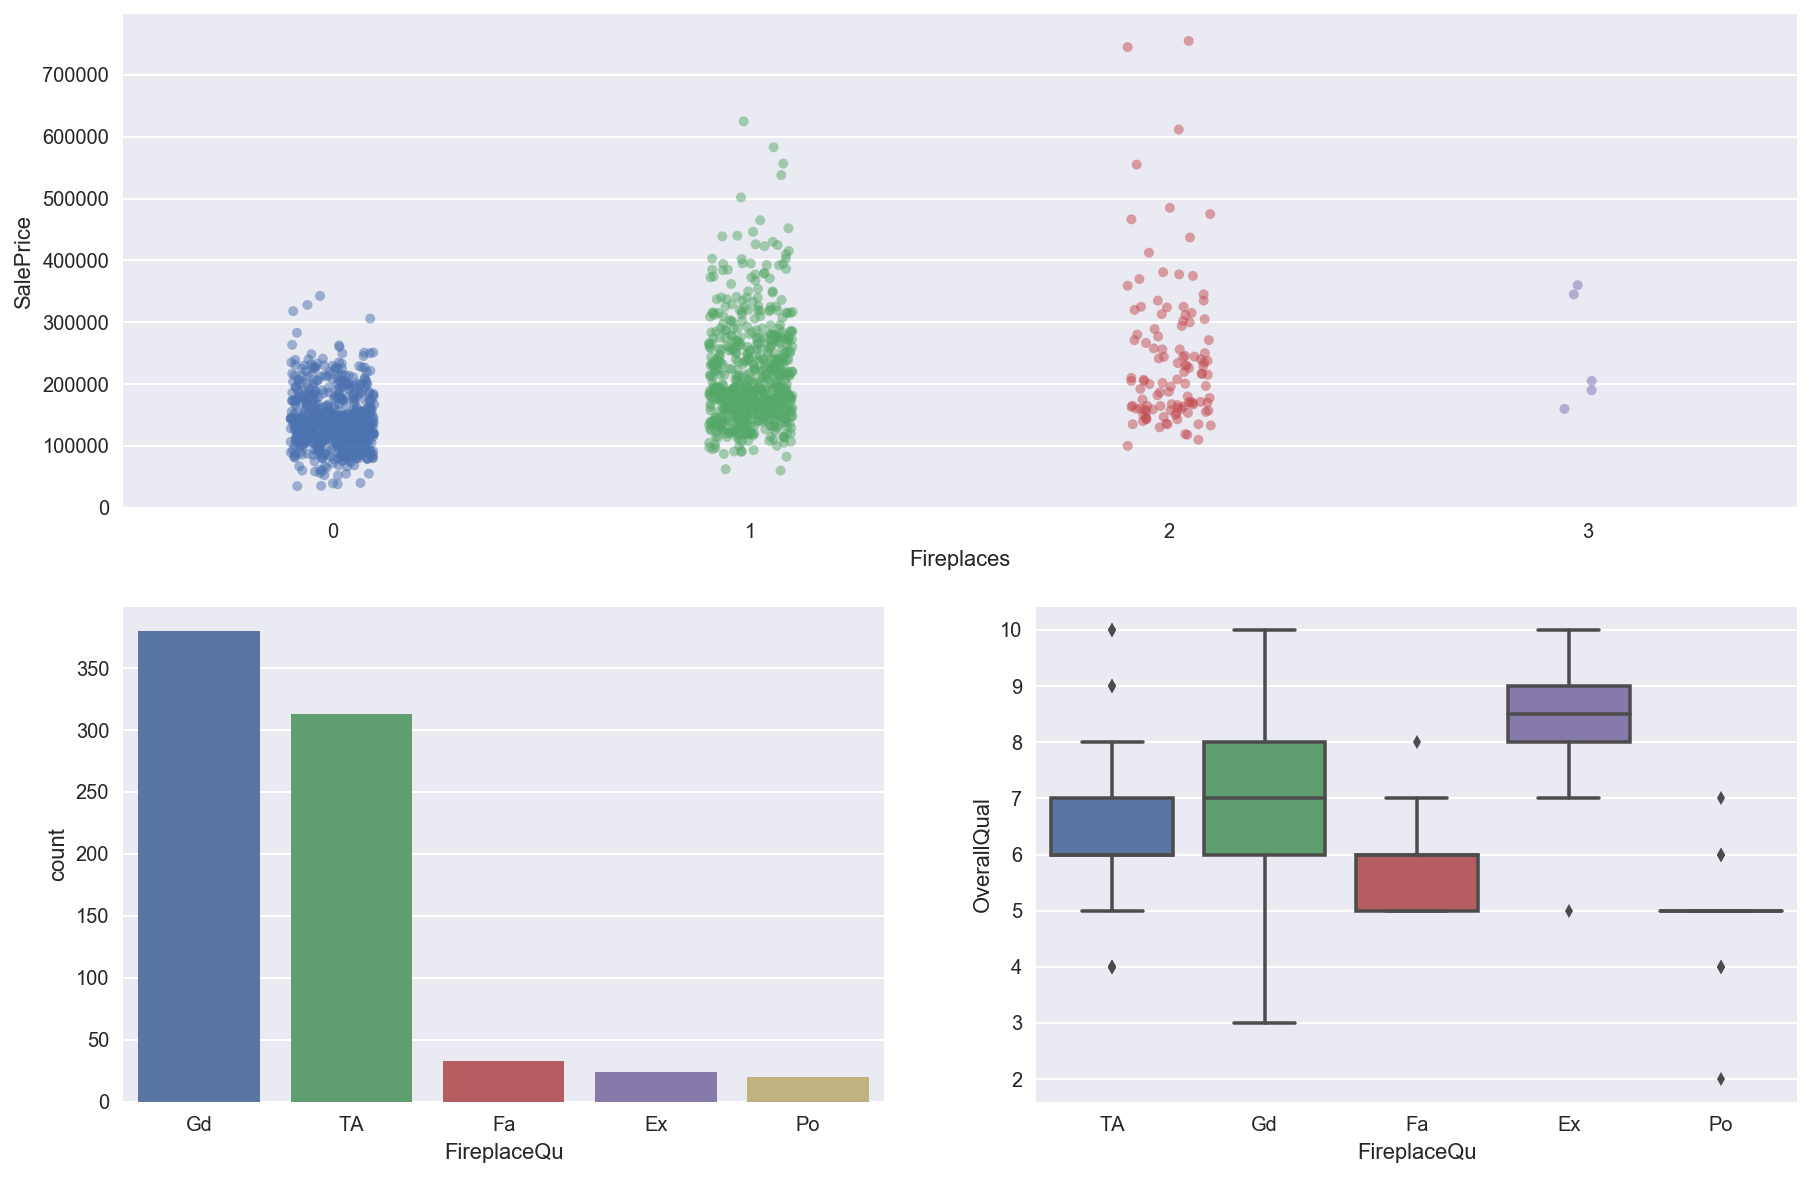

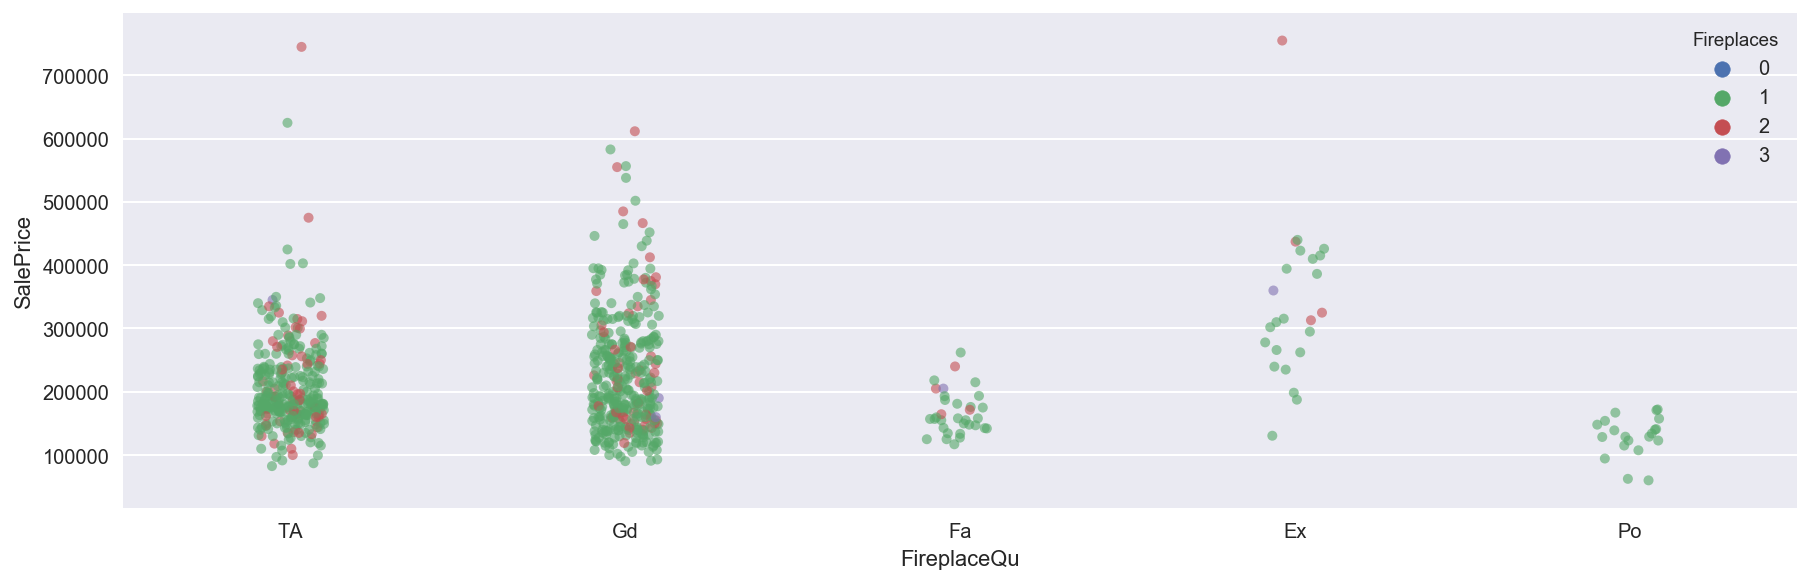

In [20]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

plt.show()

#### Comments:

1. FirePlaces가 0개인 집과 1개인 집의 가격 차이가 있음을 볼 수 있음.
2. FireplaceQu와 OverallQual은 밀접한 관계가 있음.
3. FireplaceQu는 SalePrice에 많은 영향을 미친다고 볼 수는 없음.
4. 같은 GrLivArea임에도 Fireplaces의 갯수는 차이가 있음.

### 1-3-6 지하 욕실

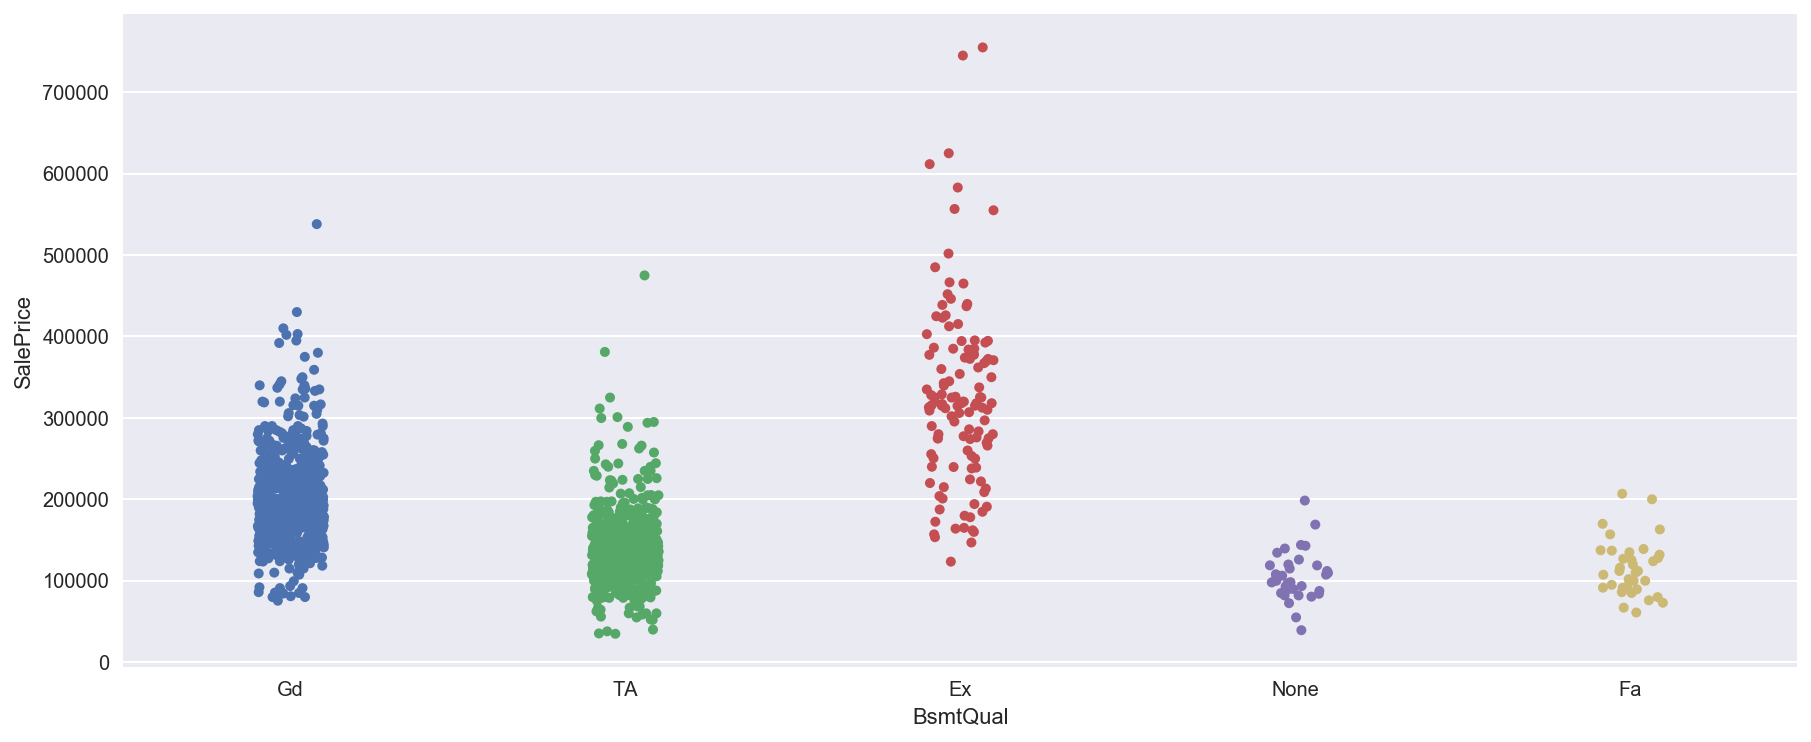

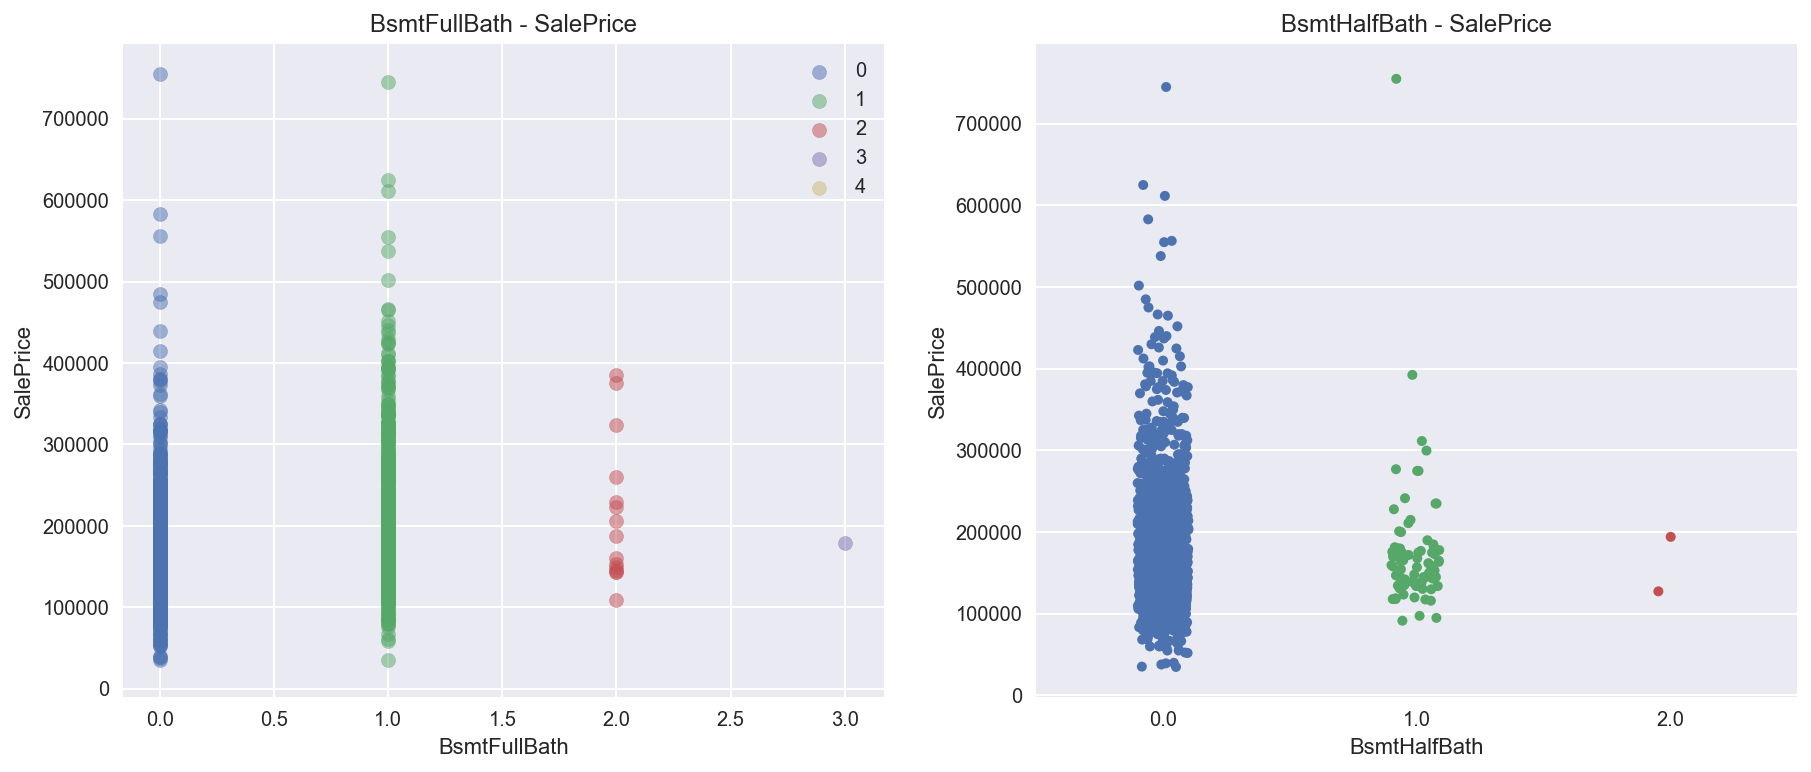

In [119]:
plt.figure(figsize=(15,6))
sns.stripplot(x = "BsmtQual", y = "SalePrice", data=train, jitter=True)


plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for BSMT in range(0,5):
    index = train.BsmtFullBath == BSMT
    ax1.scatter(x = train.BsmtFullBath.loc[index], y = train.SalePrice.loc[index], data=train, label=BSMT, alpha='0.5')

ax1.legend()
ax1.set_title('BsmtFullBath - SalePrice')
ax1.set_xlabel('BsmtFullBath')
ax1.set_ylabel('SalePrice')


ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BsmtHalfBath", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BsmtHalfBath - SalePrice')
ax2.legend()

plt.show()

#### Comment :
1. 욕실의 품질이 좋을 수록 집값이 높아지는 것을 알 수 있음
2. HalfBath의 경우에는 많을수록 집값은 더 내려가는 것을 확인할 수 있음.

### 1-3-7 방의 크기

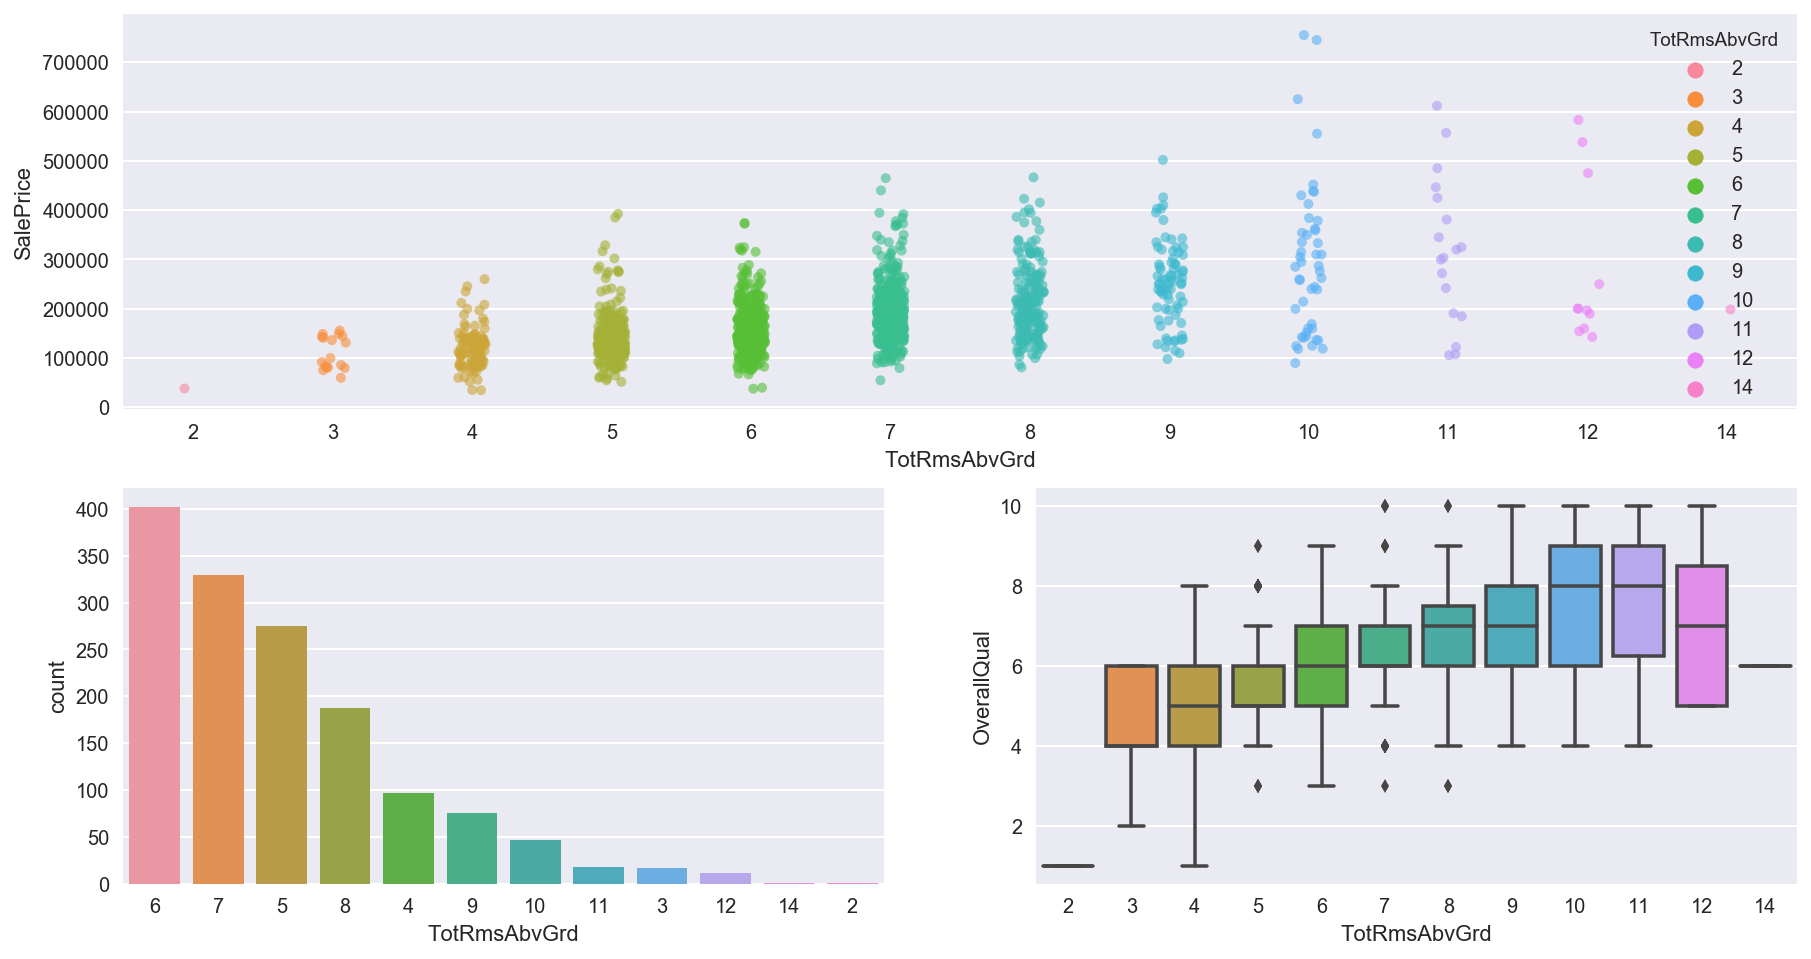

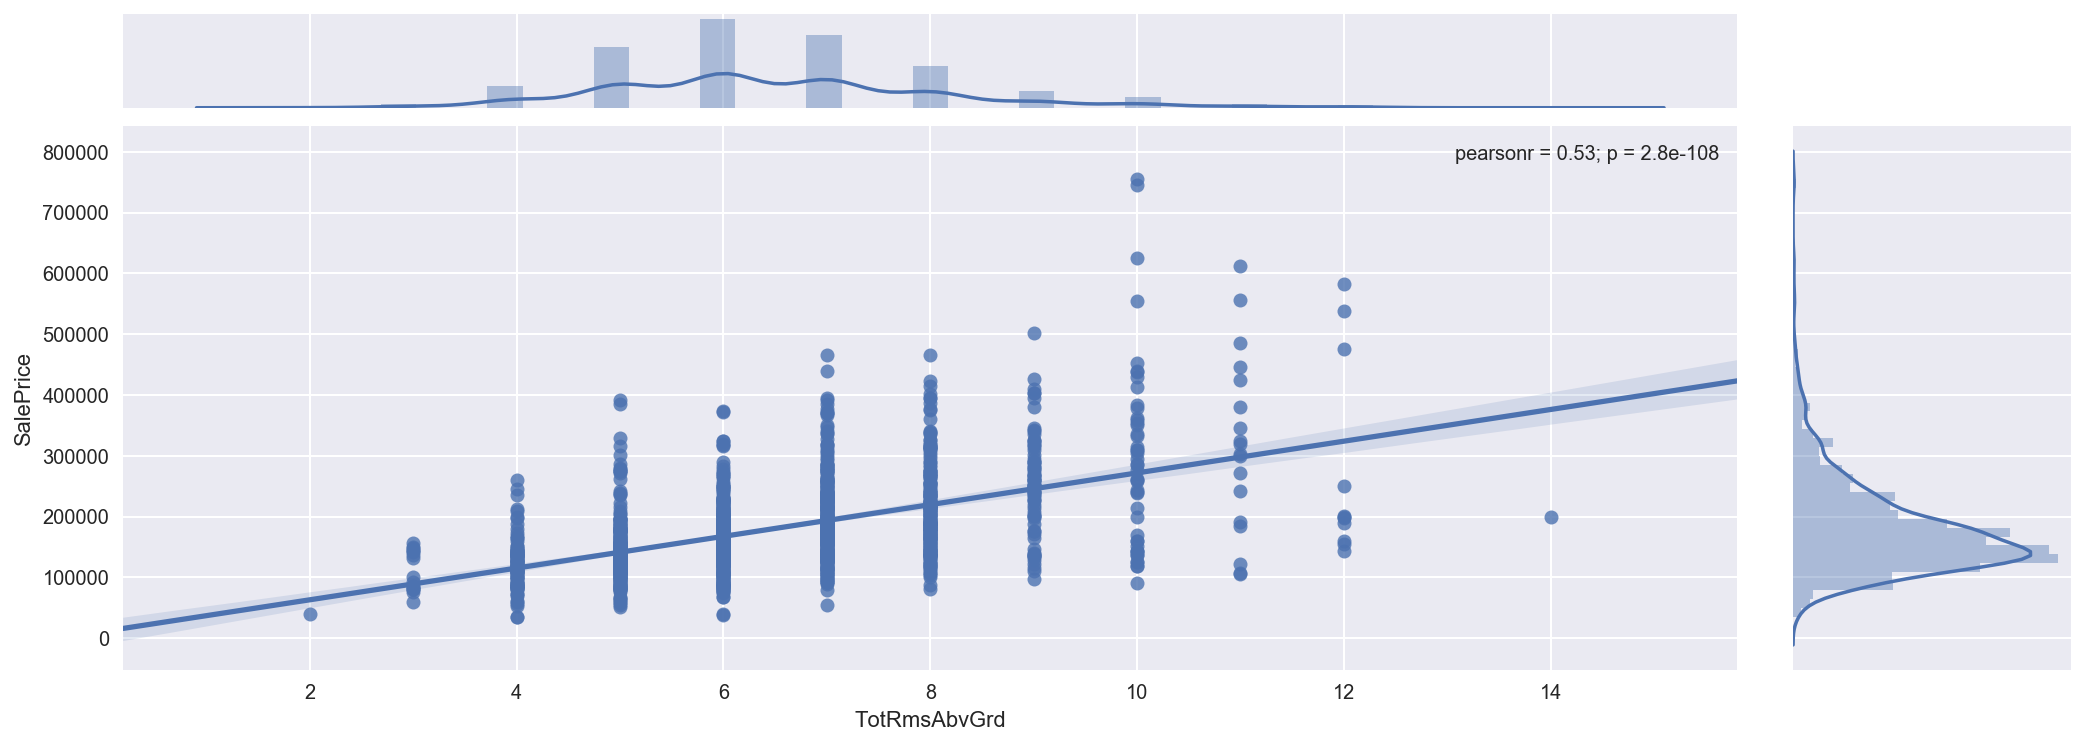

In [22]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(2,1,1)
sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd', data=train, jitter=True, alpha=0.6, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "TotRmsAbvGrd", data=train , ax = ax2, order = train["TotRmsAbvGrd"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'OverallQual', data = train, ax=ax3)
plt.show()


grid = sns.jointplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train, kind="reg", size = 8)
grid.fig.set_size_inches(15,5)

#### Comment :

1. 방의 등급 (TotRmsAbvGrd)이 좋을 수록 집값은 높은 경향이 있음
2. 방의 등급이 좋을수록 집의 품질도 좋아진다는 상관관계를 확인할 수 있음


### 2. Feature Engineering

### 2-1 Missing Data 처리

#### 2-1-1 Train 데이터와 Test 데이터 결합
Train과 Test데이터를 결합한 후 missing 데이터를 한꺼번에 처리

In [23]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train, test)).reset_index(drop=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 81)


#### 2-1-2 Missing Data 현황

Missing Data가 포함된 변수의 갯수 :  [34]
총 Missing Data 갯수 :  [13965]


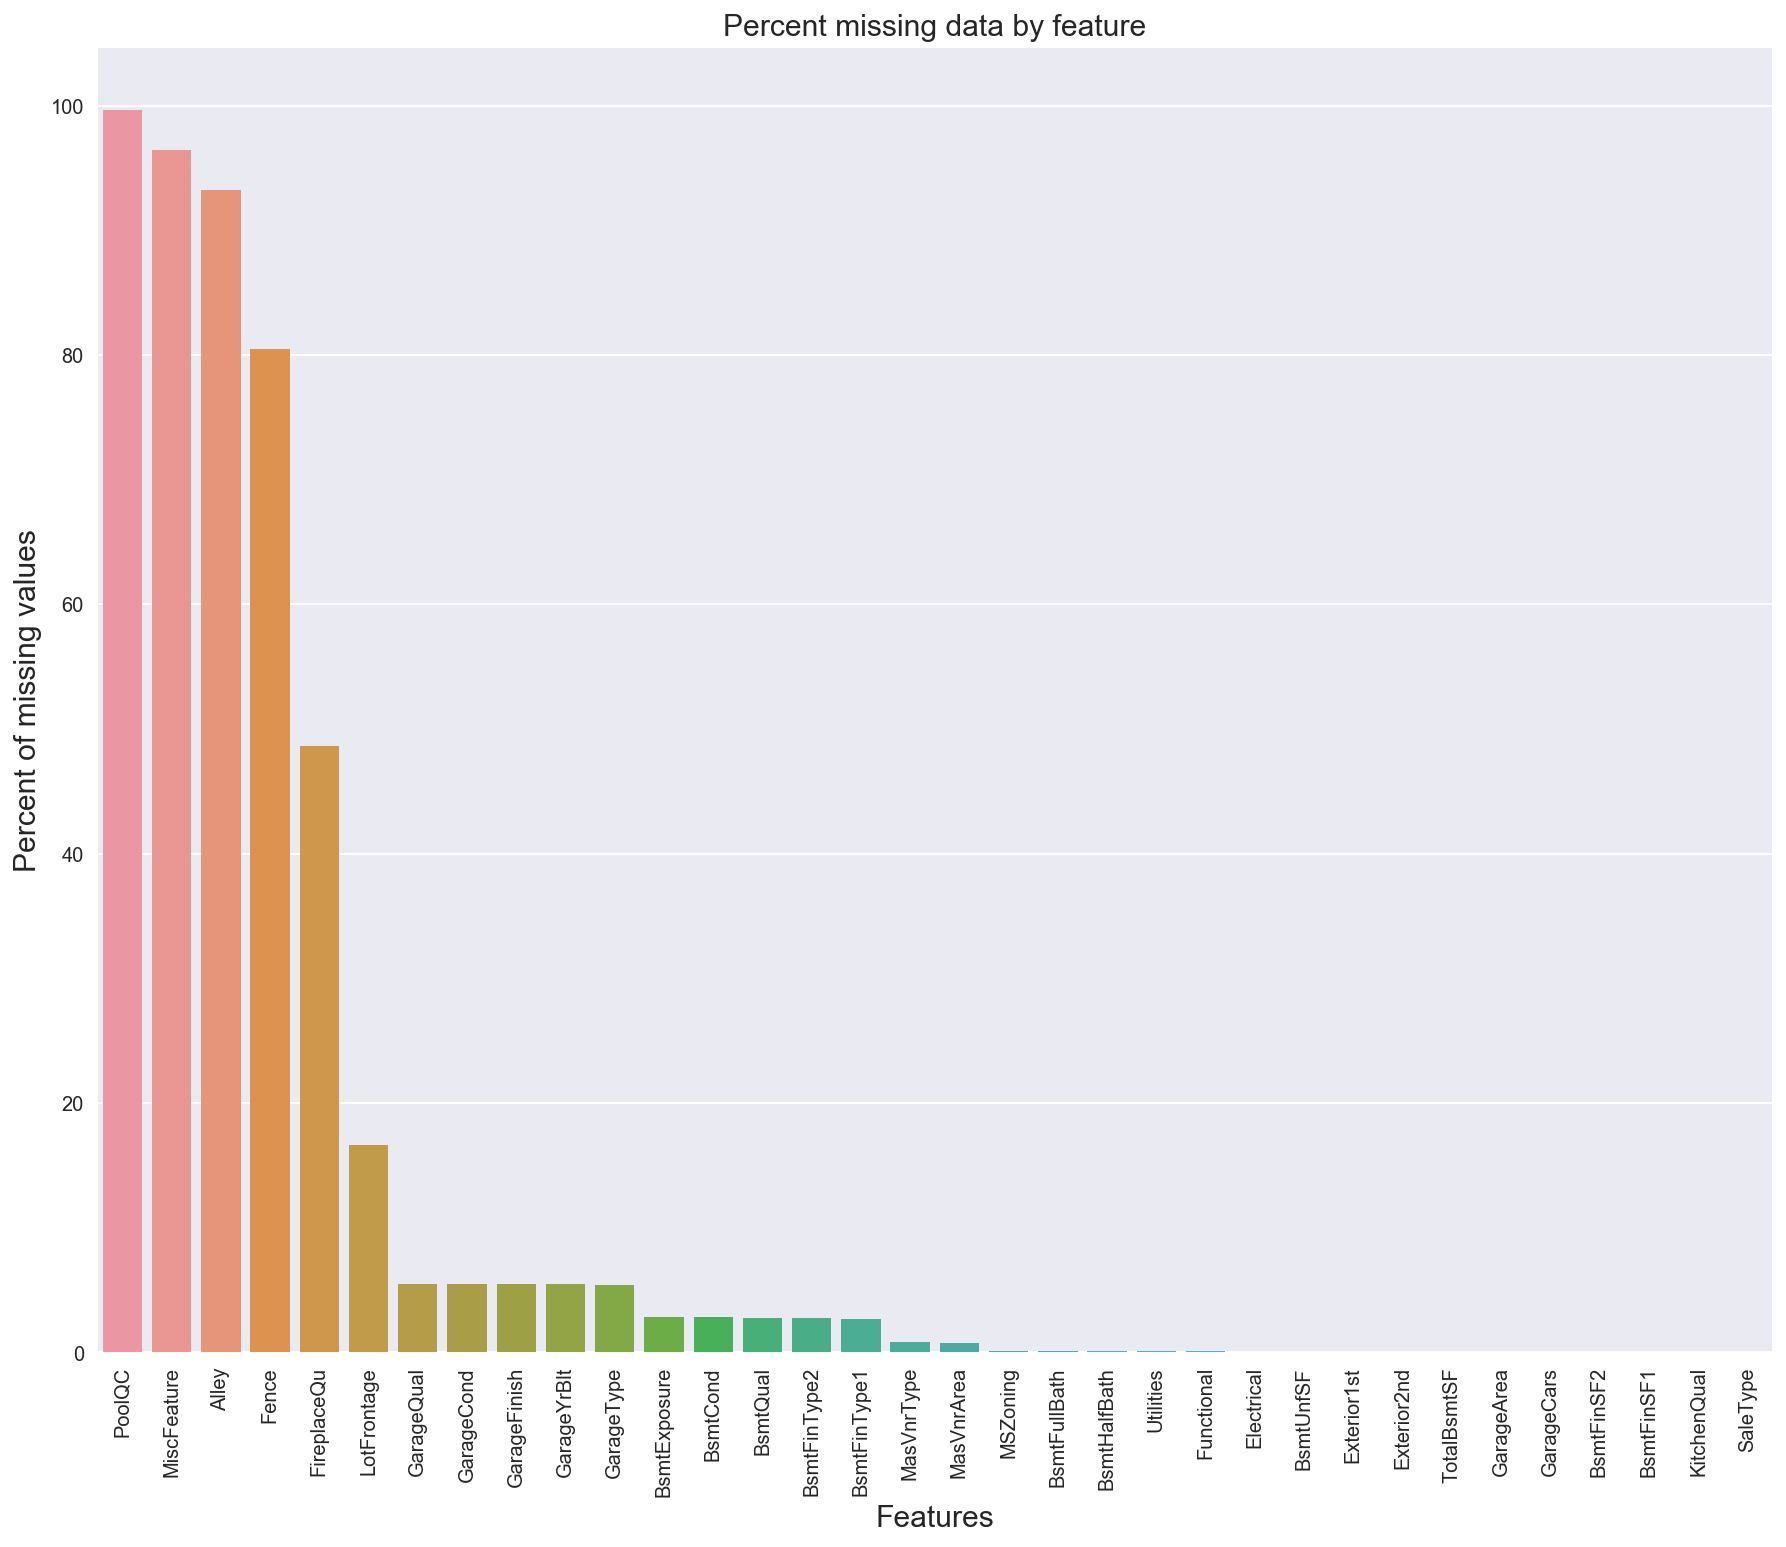

In [24]:
# all_data의 독립성을 유지하기 위해 all_data_cp 에 복사해서 코딩진행 
all_data_cp = all_data.copy()
# saleprice 항목 drop  
all_data_cp.drop(['SalePrice'], axis=1, inplace=True)
# all_data중에 널값을 확인하기 위한 코드
all_data_null = all_data_cp.isnull().sum()
all_data_null = all_data_null.drop(all_data_null[all_data_null == 0].index).sort_values(ascending=False)
all_data_missing = pd.DataFrame({'Missing Numbers' :all_data_null})
all_data_null =  all_data_null / len(all_data_cp)*100

# 위에서 구한 null 값을 이용해서 missing data feature를 plot으로 표현 
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_null.index, y=all_data_null)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

print("Missing Data가 포함된 변수의 갯수 : " , all_data_missing.count().values)
print("총 Missing Data 갯수 : " , all_data_missing.sum().values)

#### 2-1-3 Missing Data 처리방식

MSSubClass

 - 변수 설명 : 집안 판매와 관련된 종합적인 유형 식별 
 - 변수 처리 : 데이터가 고르게 분포되어있고 특정 데이터로 판단하기 어렵기에 None값으로 채워줌

In [25]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

SaleType
 - 변수 설명 : 집계약의 판매 방식을 기입   
 - 처리 방법 : 전체 데이터 중 87%가 WD (Warranty Deed - Conventional) 방식을 사용하고 있으므로 Missing Data을 WD로 채워넣었음 

In [26]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

KitchenQual:
 - 변수 설명 : 부억의 품질
 - 처리 방법 : 전체 데이터 중 52%가 TA (Typical/Average)의 등급이 되어있으므로 Missing Data을  TA로 채워넣었음

In [27]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

BsmtFinSF1 & BsmtFinSF2

 - 변수 설명 : 지하실의 마감 품질 
 - 처리 방법 : 두 데이터 모두 약35%의 데이터가 0으로 되어있으므로 Missing Data을 0으로 채워넣었음

In [28]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

GarageCars  &  GarageArea & GarageYrBlt

 - 변수 설명 : 차고의 자동차 수 & 차고 크기 & 건축연한
 - 처리 방법 : 데이터가 missing이라는것은 차가 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [29]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

TotalBsmtSF

 - 변수 설명 : 지하실 면적의 총 평방 피트 (크기)
 - 처리 방법 : 데이터가 missing이라는것은 지하실이 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [30]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

BsmtUnfSF

 - 변수 설명 : 지하 공간의 미완성 된 공간의 크기
 - 처리 방법 : 데이터가 missing이라는것은 지하실이 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [31]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

BsmtQual & BsmtCond

 - 변수 설명 : 지하실 높이에 따른 품질 & Condition
 - 처리 방법 : BsmtQual 데이터에서의 Nan값은 지하실이없어 품질 측정 BsmtCond같은 경우에도 비슷한 성격의 변수이기에 Nan값은 None으로 변환해줌

In [32]:
all_data['BsmtQual']=all_data['BsmtQual'].fillna('None')
all_data['BsmtCond']=all_data['BsmtCond'].fillna('None')

BsmtExposure & BsmtFinType1 & BsmtFinType2

 - 변수 설명 : 지하실의 품질관련 변수 
 - 처리 방법 : 여기에서 Nan값은 지하실이 없는 집을 표기한것으로 None 값으로 변환

In [33]:
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna('None')

BsmtFullBath & BsmtHalfBath

 - 변수 설명 : 화장실 욕조 or 샤워시설 유무에 따라 Full&Half로 나눔 
 - 처리 방법 : Missing data는 욕실이 없음을 의미하다고 판단 Missing data를 0으로 채워넣음

In [34]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)

Electrical

 - 변수 설명 : 전기 규격
 - 처리 방법 : 약 92%이상의 데이터가 SBrkr이라는 전기 규격을 사용 mode값으로 Missing Data 를 채워넣음

In [35]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Utilities

 - 변수 설명 : 사용 가능한 편의 시설
 - 처리 방법 : Test 데이터의 100%가 AllPub으로 이루어져 있어 큰 의미는 없다고 판단 drop 처리함

In [36]:
all_data.drop(['Utilities'], axis=1, inplace=True)

MSZoning

 - 변수 설명 : 주거구역 설명  
 - 처리 방법 : 78%이상의 데이터가 RL로 이루어져 있어 mode값을 사용하여 Missing data들을 처리함

In [37]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

MasVnrArea

 - 변수 설명 : 평방 피트 단위의 벽돌 무늬 겉치장
 - 처리 방법 : 약 60%의 데이터가 0이며, 치장이 안되어있는것으로 되어있어 Missing data들은 0으로 데이터를 넣어주어줌

In [38]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

MasVnrType

 - 변수 설명 : MasVnrArea의 벽돌 무늬 유형
 - 처리 방법 : 약 60%의 데이터가 None 즉 치장이 안되어있는것으로 되어있어 Missing data들은 None 값으로 데이터를 넣어줌

In [39]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')

GarageType

 - 변수 설명 : 차고위치
 - 처리 방법 : Attchd, Detchd, BuiltIn, Basment, 2Types, CarPort 총 6가지 카테고리가 있고 여기에서 Nan값은 차고가 없는 사람을 표기한것으로 None 값으로 변환해줌

In [40]:
all_data['GarageType']=all_data['GarageType'].fillna('None')

GarageYrBlt

 - 변수 설명 : 차고건축연도
 - 처리 방법 : 차고건축연도는 보통은 건축연도와 같기때문에 Nan값은 건축연도로 채워넣기로 함

In [41]:
all_data['GarageYrBlt'][all_data['GarageYrBlt']>2150]
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(all_data['YearBuilt'][ all_data['GarageYrBlt'].isnull()])

GarageFinish, GarageCond, GarageQual

 - 변수 설명 : 차고 품질관련 카테고리 
 - 처리 방법 : 3가지 feature 모두 비슷한 데이터이고 nan값의 수도 동일함. 
   Nan값은 차고가 없는 사람을 표기한 것으로 None 값으로 처리

In [42]:
all_data['GarageFinish']=all_data['GarageFinish'].fillna('None')
all_data['GarageCond']=all_data['GarageCond'].fillna('None')
all_data['GarageQual']=all_data['GarageQual'].fillna('None')

LotFrontage
 - 처리 방법 : Neighborhood를 그룹화하여 같은 Neighborhood내의 median값으로 처리

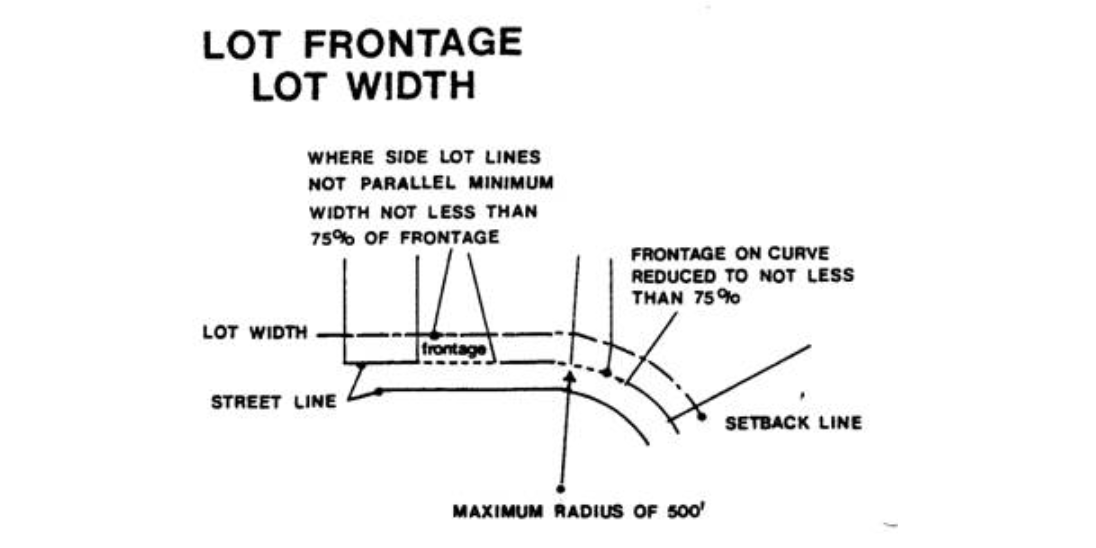

In [43]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

FireplaceQu

 - 변수 설명 : 벽난로 품질
 - 처리 방법 : Nan값은 벽난로가 없는것을 표기한것으로 None 값으로 변환

In [44]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

Fence

 - 변수 설명 : 울타리 품질
 - 처리 방법 : Nan값은 울타리가 없는 것이며, None 값으로 변환

In [45]:
all_data['Fence']=all_data['Fence'].fillna('None')

Alley

 - 처리 방법 : Grvl,Pave 2가지의 카테고리값으로 이루어져있으며 Nan값은 인접한 골목이 없는것을 표기한것으로 None 값으로 변환

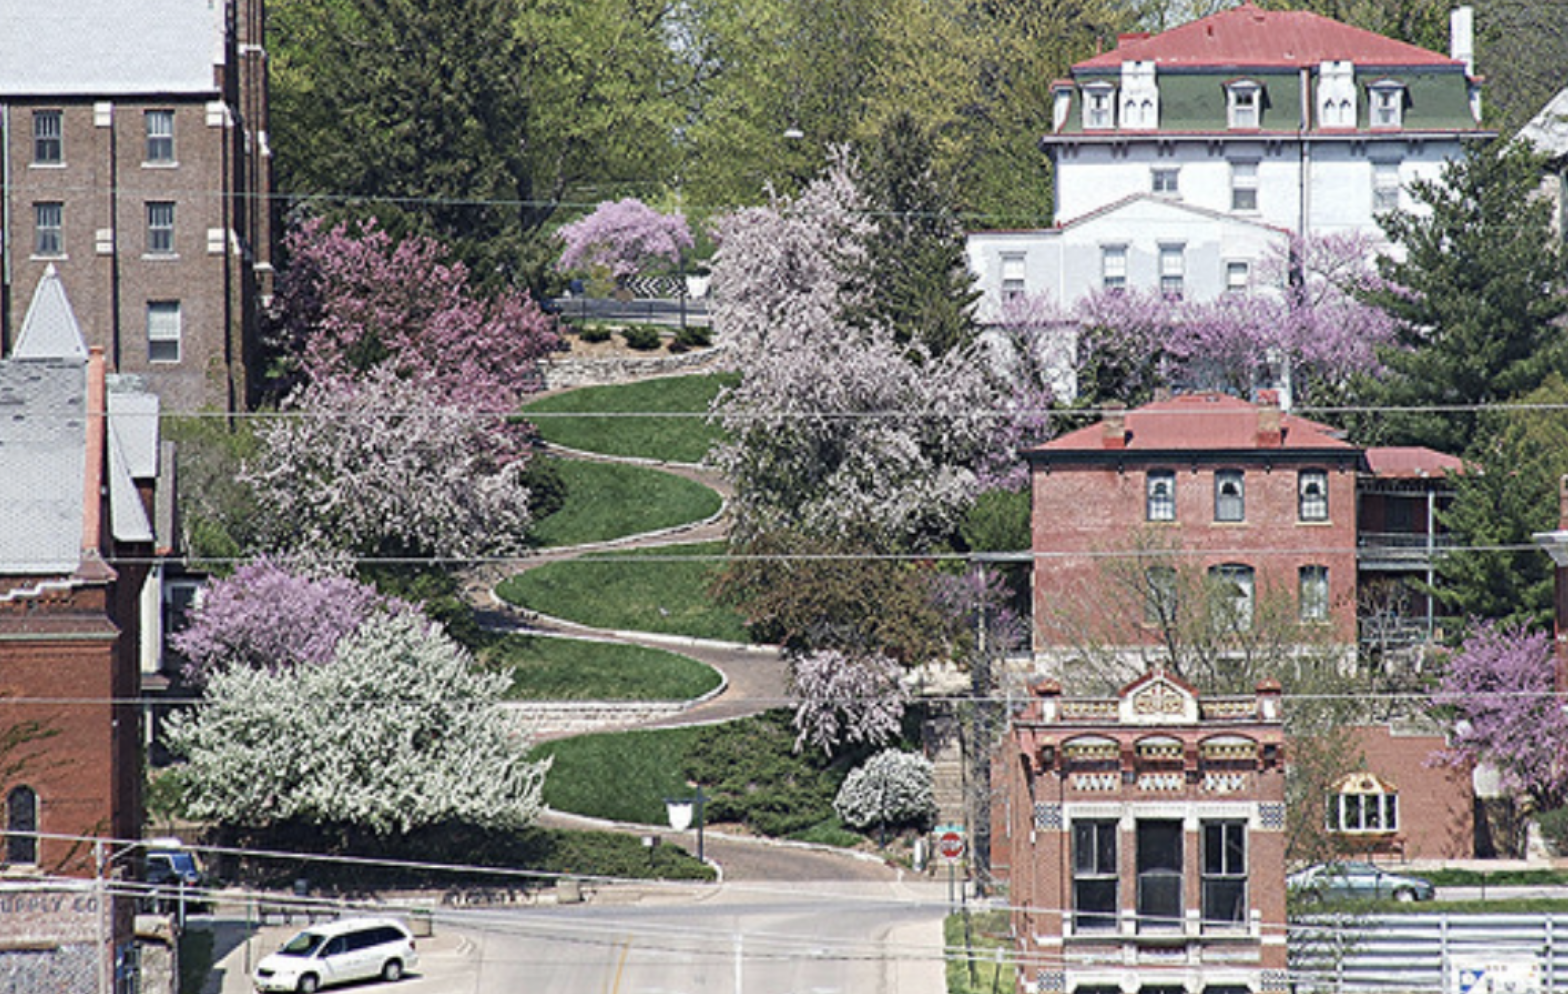

In [46]:
all_data['Alley']=all_data['Alley'].fillna('None')

Functional

 - 변수 설명 : 집의 용도
 - 처리 방법 : 전체의 93%이상의 데이터가 Typ형식으로 이루어져있어 nan값들은 이 기능들에 포함되는 집이라 예측할 수 있어 Typ으로 대체

In [47]:
all_data['Functional']= all_data["Functional"].fillna("Typ")

MiscFeature 

 - 변수 설명 : 범주에 나타나지 않은 기타 기능들
 - 처리 방법 : nan값들은 이 기능들을 포함하고 있지 않은 집이므로 none값으로 대체

In [48]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

PoolQC

 - 변수 설명 : 수영장 품질
 - 처리 방법 : nan값들은 수영장을 포함하고 있지 않은 집이므로 none값으로 대체

In [49]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

Exterior1st & Exterior2nd

 - 변수 설명 : 주택의 외장재
 - 처리 방법 : 대부분의 외장재가 VinylSd로 되어있어 VinylSd로 예측 nan값을 mode로 채워줌

In [50]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

### 2-2 변수간의 상관관계 (Correlation)

#### 2-2-1 정량적 변수 (Numerical Features)
정량적 변수간의 상관관계를 Heatmap으로 확인 

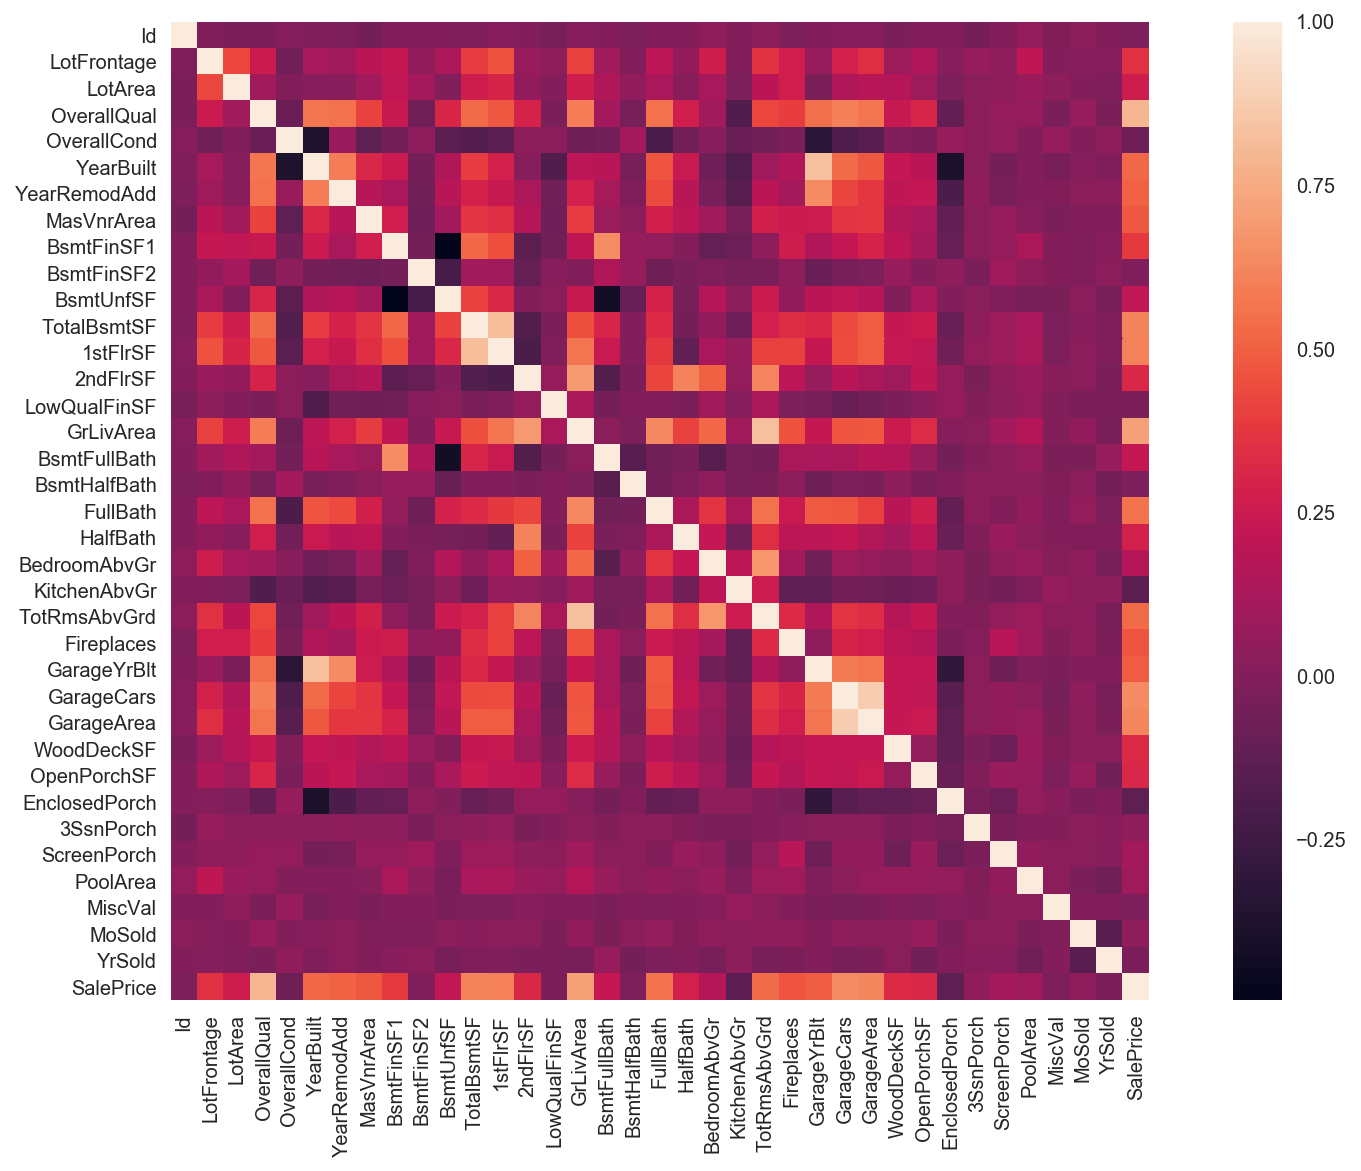

In [51]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

타겟 데이터(SalePrice)와 상관관계가 높은 순서대로 15개 추출

In [52]:
k = 15

cor_numerical_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
print("정량적 변수(Numerical Features)의 갯수 :" ,len(cor_numerical_cols), "\n")
print("정량적 변수(Numerical Features)       : \n",list(cor_numerical_cols))

정량적 변수(Numerical Features)의 갯수 : 15 

정량적 변수(Numerical Features)       : 
 ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


#### 2-2-2 정성적 변수 (Categorical Features)

In [53]:
train_cat = train[categorical_features]
y_train_d = train['SalePrice']

# train_cat = pd.concat([y_train_d, train_cat], axis=1)

In [54]:
#카테고리 데이터의 더미화
train_cat_dummies = pd.get_dummies(train_cat)

In [55]:
train_cat = pd.concat([y_train_d, train_cat_dummies], axis=1)

In [56]:
corrmat2 = train_cat.corr()

In [57]:
#상관계수가 높은 상위 10개
k = 10

cor_categorical_cols = corrmat2.nlargest(k, 'SalePrice')['SalePrice'].index 
cor_categorical_cols

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'Foundation_PConc',
       'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt'],
      dtype='object')

### 2-3 1차 변수 선정 (By OLS Model)

#### 2-3-1 정량적 변수 (Numerical Features) 사용

In [58]:
# Train, Test 데이터 준비
train = all_data[:ntrain]
test = all_data[ntrain:]

# add_constant란 함수를 이용 전체값에 1인 열을 추가 
train = sm.add_constant(train)
train.tail()

const  1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  \
1455    1.0       953       694          0  None             3     1Fam   
1456    1.0      2073         0          0  None             3     1Fam   
1457    1.0      1188      1152          0  None             4     1Fam   
1458    1.0      1078         0          0  None             2     1Fam   
1459    1.0      1256         0          0  None             3     1Fam   

     BsmtCond BsmtExposure  BsmtFinSF1  ...    SalePrice SaleType ScreenPorch  \
1455       TA           No         0.0  ...     175000.0       WD           0   
1456       TA           No       790.0  ...     210000.0       WD           0   
1457       Gd           No       275.0  ...     266500.0       WD           0   
1458       TA           Mn        49.0  ...     142125.0       WD           0   
1459       TA           No       830.0  ...     147500.0       WD           0   

      Street  TotRmsAbvGrd TotalBsmtSF  WoodDeckSF YearBuilt YearRemodAdd  \
1455    Pave             7       953.0           0      1999         2000   
1456    Pave             7      1542.0         349      1978         1988   
1457    Pave             9      1152.0           0      1941         2006   
1458    Pave             5      1078.0         366      1950         1996   
1459    Pave             6      1256.0         736      1965         1965   

     YrSold  
1455   2007  
1456   2010  
1457   2010  
1458   2010  
1459   2008  

[5 rows x 81 columns]

In [59]:
#Numerical features로 train 데이터 만들기
train_n = train[numerical_features]

#Numerical features로 이루어진 데이터 중 Id와 SalePrice를 제외시킴
train_n = train_n.drop(['Id', 'SalePrice'], axis=1)

#SalePrice에 로그를 적용해서 정규화진행
y_train_l = np.log1p(y_train_d)

In [60]:
#OLS 모델에 적용 후 model1_1으로 저장
model1_1 = sm.OLS(y_train_l, train_n)
result1_1 = model1_1.fit()
# print(result1_1.summary())

#### 2-3-2 정성적 변수 (Categorical Features) 사용

In [61]:
#Utilities은 제외함
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

#Categorical features로 이뤄진 데이터를 더미로 변환
train_c = pd.get_dummies(train[categorical_features])
train_c.tail()

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1455               0               0               0               0   
1456               0               0               0               0   
1457               0               0               0               0   
1458               0               0               0               0   
1459               0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1455              0              0              0              0   
1456              1              0              0              0   
1457              0              0              0              0   
1458              1              0              0              0   
1459              1              0              0              0   

      MSSubClass_50  MSSubClass_60          ...            SaleType_ConLw  \
1455              0              1          ...                         0   
1456              0              0          ...                         0   
1457              0              0          ...                         0   
1458              0              0          ...                         0   
1459              0              0          ...                         0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1455                     1                      0  
1456                     1                      0  
1457                     1                      0  
1458                     1                      0  
1459                     1                      0  

[5 rows x 279 columns]

In [62]:
#OLS 모델에 적용 후 model1_2으로 저장
model1_2 = sm.OLS(y_train_l, train_c)
result1_2 = model1_2.fit()
# print(result1_2.summary())

#### 2-3-3 정량적 변수와  정성적 변수를 함께 사용

In [63]:
#정량적 데이터와 정성적(더미) 데이터를 결합
train_all = pd.concat([train_n, train_c], axis=1)
train_all.tail()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
1455         0.0         0.0         0.0      953.0          ...             
1456       119.0       790.0       163.0      589.0          ...             
1457         0.0       275.0         0.0      877.0          ...             
1458         0.0        49.0      1029.0        0.0          ...             
1459         0.0       830.0       290.0      136.0          ...             

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1455                      0                      0                     0   
1456                      0                      0                     0   
1457                      0                      0                     0   
1458                      0                      0                     0   
1459                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
1455                     0                     1                      0  
1456                     0                     1                      0  
1457                     0                     1                      0  
1458                     0                     1                      0  
1459                     0                     1                      0  

[5 rows x 314 columns]

In [64]:
#OLS 모델에 적용 후 model1_3으로 저장
model1_3 = sm.OLS(y_train_l, train_all)
result1_3 = model1_3.fit()
# print(result1_3.summary())

#### 2-3-4 정량적 변수와 종속변수 (SalePrice)  상관계수 Top 14 사용

In [65]:
#상관계수가 높은 15개 정량적 변수 저장
cor_numerical_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1']

#15개의 정량적 변수를 이용하여 데이터 만들기
train_nc = train[cor_numerical_cols]
train_nc.tail()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1  
1455         0.0           1         0.0  
1456       119.0           2       790.0  
1457         0.0           2       275.0  
1458         0.0           0        49.0  
1459         0.0           0       830.0

In [66]:
#OLS 모델에 적용 후 model1_4 로 저장
model1_4 = sm.OLS(y_train_l, train_nc)
result1_4 = model1_4.fit()
# print(result1_4.summary())

#### 2-3-5 상관계수가 높은 정량적 변수 14개와 정성적 변수 5개 사용

In [67]:
#정성적 변수 5개를 이용하여 데이터 만들기
cor_categorical_cols = ['Neighborhood', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'PoolQC']
train_cc = train[cor_categorical_cols]

#정량적 변수와 정성적 변수 결합
train_all_c = pd.concat([train_nc, train_cc], axis=1)
train_all_c.tail()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1 Neighborhood ExterQual KitchenQual  \
1455         0.0           1         0.0      Gilbert        TA          TA   
1456       119.0           2       790.0       NWAmes        TA          TA   
1457         0.0           2       275.0      Crawfor        Ex          Gd   
1458         0.0           0        49.0        NAmes        TA          Gd   
1459         0.0           0       830.0      Edwards        Gd          TA   

     BsmtQual PoolQC  
1455       Gd   None  
1456       Gd   None  
1457       TA   None  
1458       TA   None  
1459       TA   None

In [68]:
#데이터를 더미 시킨 후 Constant변수 추가 
train_all_c = pd.get_dummies(train_all_c)
train_all_c = sm.add_constant(train_all_c)

train_all_c.tail()

const  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
1455    1.0            6       1647         2.0       460.0        953.0   
1456    1.0            6       2073         2.0       500.0       1542.0   
1457    1.0            7       2340         1.0       252.0       1152.0   
1458    1.0            5       1078         1.0       240.0       1078.0   
1459    1.0            5       1256         1.0       276.0       1256.0   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt     ...       \
1455       953         2             7       1999     ...        
1456      2073         2             7       1978     ...        
1457      1188         2             9       1941     ...        
1458      1078         1             5       1950     ...        
1459      1256         1             6       1965     ...        

      KitchenQual_TA  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  \
1455               1            0            0            1              0   
1456               1            0            0            1              0   
1457               0            0            0            0              0   
1458               0            0            0            0              0   
1459               1            0            0            0              0   

      BsmtQual_TA  PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  PoolQC_None  
1455            0          0          0          0            1  
1456            0          0          0          0            1  
1457            1          0          0          0            1  
1458            1          0          0          0            1  
1459            1          0          0          0            1  

[5 rows x 57 columns]

In [69]:
#OLS 모델에 적용 후 model1_5 로 저장
model1_5 = sm.OLS(y_train_l, train_all_c)
result1_5 = model1_5.fit()
# print(result1_5.summary())

#### 2-3-6 변수간 다중공선성과 분산분석 

#### (1) 변수간 다중공선성

 - 다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우를 말하며, 독립변수들이 서로 독립이 아니라 상호상관관계가 강한 경우 발생함
 - 다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가
 - 상호의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용하며 숫자가 높을수록 다른 변수에 의존적임을 알 수 있음
 $$
 \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2}
 $$

In [70]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_all_c.values, i) for i in range(train_all_c.values.shape[1])]
vif["features"] = train_all_c.columns
vif.sort_values("VIF Factor", ascending = True).head(20)

VIF Factor              features
0     0.000000                 const
13    1.634796            Fireplaces
12    1.656497            MasVnrArea
14    1.677789            BsmtFinSF1
11    1.934078           GarageYrBlt
10    2.316177          YearRemodAdd
7     2.641831              FullBath
8     3.883378          TotRmsAbvGrd
1     3.923020           OverallQual
4     5.732055            GarageArea
6     6.077954              1stFlrSF
3     6.552045            GarageCars
2     6.713399             GrLivArea
9     6.738343             YearBuilt
5     6.989393           TotalBsmtSF
37         inf  Neighborhood_StoneBr
38         inf   Neighborhood_Timber
39         inf  Neighborhood_Veenker
40         inf          ExterQual_Ex
41         inf          ExterQual_Fa

#### Comment :

1. 정성적 변수 (Categorical Features) 제외하고 추출된 변수들 간의 다중공선성은 낮게 형성되어 있음 

#### (2) 정성적 변수 (Categorical Features)에 대한 분산 분석

 - 분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법
 - 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용
 - TSS : 종속변수값의 움직임의 범위
 - ESS : 모형에서 나온 예측밧의 움직임의 범위
 - RSS : 잔차의 움직임의 범위, 즉 오차의 크기
 
 $$
 \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K)
 $$

- 분산 분석표
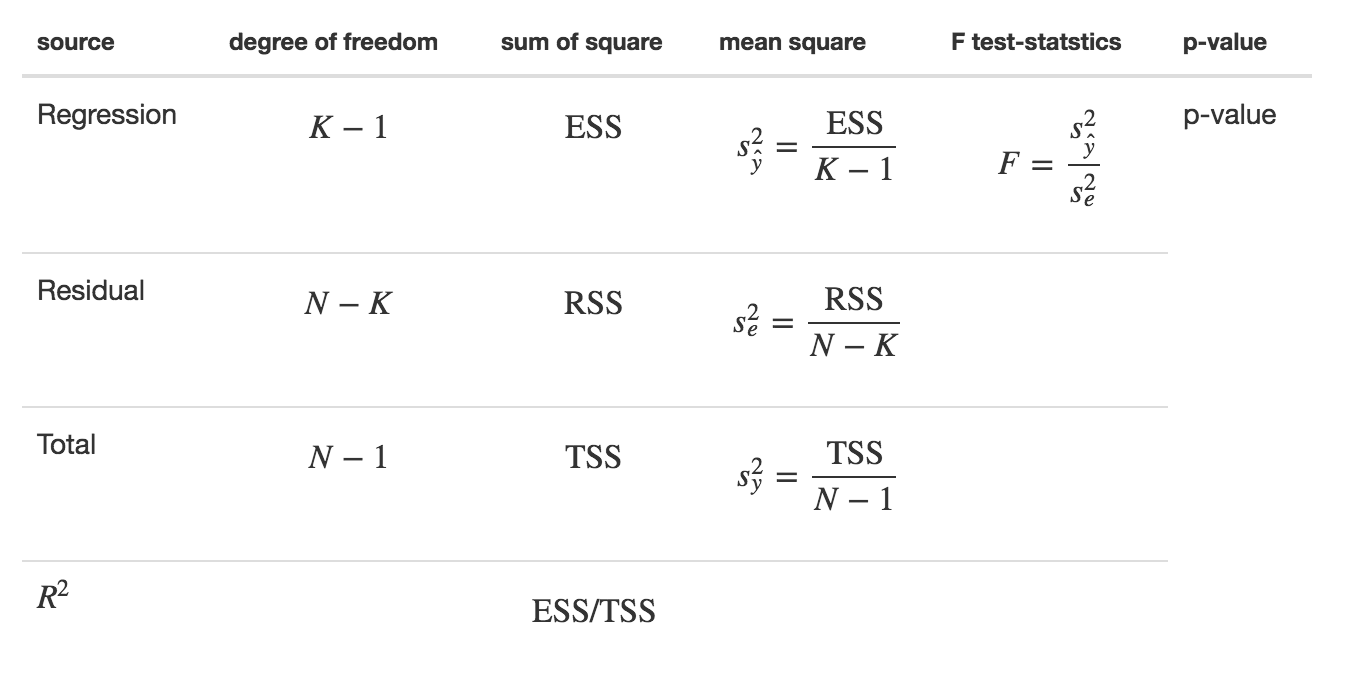

In [71]:
#Neighborhood
model_cat = sm.OLS.from_formula("SalePrice ~ C(Neighborhood)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq          F         PR(>F)
C(Neighborhood)    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual         1435.0  4.184305e+12  2.915892e+09        NaN            NaN

In [72]:
#ExterQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(ExterQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(ExterQual)     3.0  4.395744e+12  1.465248e+12  443.334831  1.439551e-204
Residual      1456.0  4.812167e+12  3.305060e+09         NaN            NaN

In [73]:
#KitchenQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(KitchenQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(KitchenQual)     3.0  4.204320e+12  1.401440e+12  407.806352  3.032213e-192
Residual        1456.0  5.003592e+12  3.436533e+09         NaN            NaN

In [74]:
#BsmtQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(BsmtQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(BsmtQual)     4.0  4.281621e+12  1.070405e+12  316.148635  8.158548e-196
Residual     1455.0  4.926290e+12  3.385766e+09         NaN            NaN

In [75]:
#PoolQC
model_cat = sm.OLS.from_formula("SalePrice ~ C(PoolQC)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq          F        PR(>F)
C(PoolQC)     3.0  1.951702e+11  6.505672e+10  10.509853  7.700989e-07
Residual   1456.0  9.012741e+12  6.190069e+09        NaN           NaN

#### Comments :

1. 추출한 아웃라이어를 바탕으로 5가지 경우의 수를 만들어 모델 1-1에 돌려봄

2. 성능을 비교한 결과 leverage와 cook's distance를 기준으로 한 아웃라이어를 사용

#### 2-3-6 변수사용별 성능비교

 1) $R_{adj}^2$ 모델별 비교 
 - 선형 회귀 모형에서 독립 변수가 추가되면 결정 계수$( R^2 )$의 값은 항상 증가함
 
 - 독립 변수 추가 효과를 상쇄하기위해 독립변수 갯수 K에 따라 결정 계수의 값을 조정하는 
   계수가 $R^2$이며, 1에 가까울수록 좋은 모형이라고 할 수 있음
$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$

In [76]:
print("result1_1.rsquared_adj :", result1_1.rsquared_adj)
print("result1_2.rsquared_adj :", result1_2.rsquared_adj)
print("result1_3.rsquared_adj :", result1_3.rsquared_adj)
print("result1_4.rsquared_adj :", result1_4.rsquared_adj)
print("result1_5.rsquared_adj :", result1_5.rsquared_adj)

result1_1.rsquared_adj : 0.999847679182
result1_2.rsquared_adj : 0.861679864865
result1_3.rsquared_adj : 0.933226462089
result1_4.rsquared_adj : 0.999816776142
result1_5.rsquared_adj : 0.867010499543


2) AIC (Akaike Information Criterion) 모델별 비교
 - AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하며, 값이 작을수록 좋은 모형에 가깝움

$$
           \text{AIC} = -2\log L + 2K \
$$


In [77]:
print("result1_1.aic :", result1_1.aic)
print("result1_2.aic :", result1_2.aic)
print("result1_3.aic :", result1_3.aic)
print("result1_4.aic :", result1_4.aic)
print("result1_5.aic :", result1_5.aic)

result1_1.aic : -1393.39487961
result1_2.aic : -1214.71731639
result1_3.aic : -2251.68847571
result1_4.aic : -1142.39296603
result1_5.aic : -1430.76835767


3) BIC 모델별 비교
 - BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형 likelihood를 측정하기 위한 값에서 유도되었으며, 값은 작을수록 좋은 모형에 가깝움

$$
           \text{BIC} = -2\log L + K\log n\
$$


In [78]:
print("result1_1.bic :", result1_1.bic)
print("result1_2.bic :", result1_2.bic)
print("result1_3.bic :", result1_3.bic)
print("result1_4.bic :", result1_4.bic)
print("result1_5.bic :", result1_5.bic)

result1_1.bic : -1218.95055302
result1_2.bic : 1.106777987
result1_3.bic : -861.420054741
result1_4.bic : -1068.38628203
result1_5.bic : -1155.88638851


#### Comment : 

1. Adj. $R^2$: 모델 1과 4번째가 0.99로 가장 높고 비슷한 성능이 나옴
2. AIC : 
3. BIC : 

### 2-4 아웃라이어

1) IQR (Interquartile Range)를 이용한 아웃라이어 선택

 - IQR : 3사분위수(Q3)과 1사분위수(Q1)의 차이 (Q3 - Q1)
 - 박스-휘스커 플롯(Box-Whisker Plot) 외부 세로선은 1.5 X IQR 을 나타내며 그 선 바깥 점을 아웃라이어라고 함

In [79]:
#IQR 아웃라이어 함수
def detect_outliers(data, feature):
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index.tolist()

    return outliers

In [80]:
# GrLivArea, OverallQual, GarageArea 
GrLivArea_outliers = detect_outliers(train, "GrLivArea")
OverallQual_outliers = detect_outliers(train, "OverallQual")
GarageCars_outliers = detect_outliers(train, "GarageArea")

2) 표준화 잔차(resid)를 이용한 아웃라이어 선택

 - 잔차를 레버리지와 잔차의 표준 편차로 나누어 동일한 표준 편차를 가지도록 스케일링한 것을 표준화 잔차(standardized residual 또는 normalized residual 또는 studentized residual) 라고 함
 
$$ 
r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} 
$$

 - StatsModels의 RegressionResult(선형회귀 결과)의 resid_pearson 속성을 이용하여 표준화 잔차를 확인할 수 있으며, 2~4 보다 크면 아웃라이어라 함

In [81]:
#model1_1에서 결과물에 대한 표준화 잔차 속성을 이용하여 2보다 큰 것을 아웃라이어로 지정
idx_r = np.where(result1_1.resid_pearson > 2)[0]

3) Cook's Distance 이용한 아웃라이어 선택

 - 레버리지와 잔차의 크기가 모두 커지면 Cook's Distance 또한 커짐 

$$ 
D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right]
$$

 - Fox' Outlier Recommendation 은 Cook's Distance가 다음과 같은 기준값보다 클 때 아웃라이어로 판단
 
 $$
 D_i > \dfrac{4}{N − K - 1}
 $$

In [82]:
#model1_1에서 결과물에 대한 Fox' Outlier Recommendation 을 이용하여 아웃라이어로 지정
influence = result1_1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_l) - len(train_n.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

4) 전체 아웃라이어 확인

In [83]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()
print("resid_outliers:", len(resid_outliers),"개 \n", resid_outliers)
print("\t")
print("cooks_outliers:", len(cooks_outliers),"개 \n", cooks_outliers)
print("\t")
print("(IQR)GrLivArea_outliers:", len(GrLivArea_outliers),"개 \n", GrLivArea_outliers)
print("\t")
print("(IQR)OverallQual_outliers", len(OverallQual_outliers),"개 \n", OverallQual_outliers)
print("\t")
print("(IQR)GarageCars_outliers:", len(GarageCars_outliers),"개 \n", GarageCars_outliers)

#제거하길 추천한 outliers(data description)
recommended_outliers = [523, 898, 1298]

resid_outliers: 26 개 
 [48, 142, 151, 178, 181, 218, 277, 378, 457, 473, 546, 669, 681, 688, 803, 807, 898, 970, 1046, 1059, 1065, 1075, 1170, 1181, 1182, 1423]
	
cooks_outliers: 67 개 
 [30, 48, 88, 93, 125, 144, 153, 178, 197, 205, 218, 277, 335, 346, 375, 378, 410, 431, 457, 462, 495, 523, 546, 588, 608, 628, 632, 635, 658, 662, 664, 666, 691, 705, 710, 728, 738, 803, 807, 810, 812, 898, 907, 916, 942, 968, 970, 1030, 1048, 1059, 1062, 1068, 1080, 1170, 1181, 1182, 1211, 1216, 1298, 1324, 1337, 1386, 1415, 1423, 1432, 1437, 1453]
	
(IQR)GrLivArea_outliers: 31 개 
 [58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]
	
(IQR)OverallQual_outliers 2 개 
 [375, 533]
	
(IQR)GarageCars_outliers: 21 개 
 [178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


5) 아웃라이어 집단의 조합

 - IQR [ GrLivArea_outliers , OverallQual_outliers, GarageCars_outlier ] 아웃라이어

In [84]:
IQR = list(set(GrLivArea_outliers) | set(OverallQual_outliers) | set(GarageCars_outliers))
print("IQR outliers :", len(IQR),"개 \n", IQR)

IQR outliers : 50 개 
 [1024, 769, 1031, 1417, 523, 270, 1169, 1298, 1173, 1046, 1175, 533, 664, 408, 798, 1182, 1312, 1184, 803, 1061, 1190, 304, 1328, 178, 691, 185, 58, 825, 317, 1087, 961, 324, 197, 581, 583, 1350, 1353, 1228, 718, 1241, 608, 224, 231, 1386, 496, 1268, 118, 375, 1142, 635]


 - IQR2 [ GrLivArea_outliers,  GarageCars_outlier ] 아웃라이어

In [85]:
IQR2 = list(set(GrLivArea_outliers) & set(GarageCars_outliers))
print("IQR2 outliers :", len(IQR2),"개 \n", IQR2)

IQR2 outliers : 4 개 
 [1298, 803, 1268, 1142]


 - Resid & Cook distance 아웃라이어

In [86]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print("Resid_Cooks_distance :", len(resid_cooks ),"개 \n", resid_cooks)

Resid_Cooks_distance : 77 개 
 [1030, 523, 1298, 277, 1046, 1048, 30, 546, 803, 1059, 1062, 807, 1065, 810, 812, 1068, 1324, 48, 1075, 1080, 1337, 588, 335, 88, 346, 93, 608, 1386, 628, 375, 632, 378, 635, 125, 898, 1415, 907, 142, 1423, 144, 1170, 658, 916, 662, 151, 664, 153, 410, 666, 1432, 669, 1181, 1182, 1437, 681, 1453, 942, 431, 688, 178, 691, 181, 1211, 1216, 705, 197, 710, 968, 457, 970, 205, 462, 728, 473, 218, 738, 495]


 - Resid & Cook distance & IQR 아웃라이어

In [87]:
resid_cooks_IQR = list(set(resid_cooks) | set(IQR))
print("Resid_Cooks_distance :", len(resid_cooks_IQR),"개 \n", resid_cooks_IQR)

Resid_Cooks_distance : 114 개 
 [1024, 769, 1030, 1031, 523, 270, 1298, 277, 1046, 533, 1048, 1175, 30, 798, 1312, 546, 803, 1059, 1061, 1062, 807, 1065, 810, 812, 1068, 1324, 48, 304, 1328, 1075, 1080, 1337, 58, 825, 317, 1087, 324, 581, 1350, 583, 1353, 588, 335, 88, 346, 93, 608, 1386, 628, 118, 375, 632, 1142, 378, 635, 125, 898, 1415, 1417, 907, 142, 1423, 144, 1169, 1170, 658, 916, 1173, 662, 151, 664, 153, 410, 666, 1432, 669, 1181, 1182, 1437, 408, 1184, 1190, 681, 1453, 942, 431, 688, 178, 691, 181, 185, 1211, 1216, 705, 961, 197, 710, 968, 457, 970, 1228, 205, 462, 718, 728, 473, 218, 1241, 224, 738, 231, 495, 496, 1268]


#### Comments :

1. 추출한 아웃라이어를 바탕으로 5가지 경우의 수를 만들어 모델 1-1에 돌려봄

2. 성능을 비교한 결과 leverage와 cook's distance를 기준으로 한 아웃라이어를 사용

### 2-6 데이터 전처리

#### 2-6-1 Numerical 변수 선정
- select_1 : 모델 1-1의 결과값 중 P-value가 0.05이하인 변수를 선택

In [88]:
# 모형 1의 결과값 중 P-value가 0.05이하인 변수를 선택
idx_t = np.where(result1_1.pvalues < 0.05)[0]
p_values = idx_t.tolist()

In [89]:
#index 값을 컬럼 명으로 변경
x_train_cols = train_n.columns.tolist()

select_1 = []

# 
for i in p_values:
    select_1.append(x_train_cols[i])

In [90]:
# None 값이 많고, scale 에러가 나는 PoolArea, 1stFlrArea 제외
select_1 = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']
print("모형 1의 결과값 중 P-value가 0.05이하 변수 갯수 :",len(select_1),"개\n\n", \
      "모형 1의 결과값 중 P-value가 0.05이하 변수 :","\n",select_1)

모형 1의 결과값 중 P-value가 0.05이하 변수 갯수 : 18 개

 모형 1의 결과값 중 P-value가 0.05이하 변수 : 
 ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']


- select_2 : select_1중 VIF factor를 기준으로 변수를 선택

In [91]:
# select 1의 VIF를 확인
x_train_new = train[select_1]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values("VIF Factor", ascending = True)

VIF Factor       features
16      1.169101    ScreenPorch
15      1.420685  EnclosedPorch
14      1.848788     WoodDeckSF
0       2.515890        LotArea
12      2.807139     Fireplaces
8       3.078702   BsmtFullBath
5       4.465133     BsmtFinSF1
13     12.350092     GarageCars
6      13.644366    TotalBsmtSF
9      21.701557       FullBath
10     31.045992   KitchenAbvGr
2      39.276190    OverallCond
7      49.512448      GrLivArea
1      61.974850    OverallQual
11     62.820438   TotRmsAbvGrd
3   15037.803582      YearBuilt
4   19626.651517   YearRemodAdd
17  19793.585680         YrSold

In [92]:
# 다중공선성이 높은 TotRmsAbvGrd, Yearsold, YearRemodAdd 제외
select_2 = ['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'OverallQual']
print("다중공선성이 낮은 변수 갯수 :",len(select_2),"개\n\n", \
"다중공선성이 낮은 변수 :","\n",select_2)

다중공선성이 낮은 변수 갯수 : 15 개

 다중공선성이 낮은 변수 : 
 ['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'OverallQual']


- select_3 : 상관계수가 높은 14개의 변수

In [93]:
select_3 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']
print("상관계수가 높은 변수 갯수 :",len(select_3),"개\n\n", \
"상관계수가 높은 변수 :","\n",select_3)

상관계수가 높은 변수 갯수 : 11 개

 상관계수가 높은 변수 : 
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


- select_4 : select_2와 select_3의 합집합 변수

In [94]:
select_4 = ['GarageYrBlt', 'GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']
print("select_2와 select_3의 합집합 변수 갯수 :",len(select_4),"개\n\n", \
"select_2와 select_3의 합집합 변수 :","\n",select_4)

select_2와 select_3의 합집합 변수 갯수 : 18 개

 select_2와 select_3의 합집합 변수 : 
 ['GarageYrBlt', 'GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']


- select_5 : select_4중 VIF factor를 기준으로 변수를 선택

In [95]:
# select 4의 VIF를 확인
x_train_new = train_n[select_4]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values(by="VIF Factor", ascending=True)

VIF Factor       features
10    1.157152    ScreenPorch
9     1.227157  EnclosedPorch
5     1.783620     MasVnrArea
4     1.838240     WoodDeckSF
2     2.500932        LotArea
13    2.819253     Fireplaces
8     3.068433   BsmtFullBath
12    4.440559     BsmtFinSF1
7    13.968201    TotalBsmtSF
15   19.217917       FullBath
14   24.302225      GrLivArea
6    27.978482   KitchenAbvGr
17   28.006834    OverallCond
11   30.083590     GarageArea
0    31.189071    GarageYrBlt
1    38.118332     GarageCars
16   54.596105    OverallQual
3   112.803760      YearBuilt

In [96]:
# 다중공선상이 높은 GarageArea, GarageYrBlt 제외
select_5 = ['GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']
print("select_4중 VIF factor 낮은 기준의 변수 갯수 :",len(select_5),"개\n\n", \
"select_4중 VIF factor 낮은 기준의 변수 :","\n",select_5)

select_4중 VIF factor 낮은 기준의 변수 갯수 : 16 개

 select_4중 VIF factor 낮은 기준의 변수 : 
 ['GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']


#### 2-6-2 categorical 변수 선정
- select_c1 : 모델 1-5에서 사용한 상관계수가 높은 5개의 변수

In [97]:
# 'PoolQC'는 train 더미 클래스와 test 더미 클래스가 매치하지 않는 것이 존재하므로 제외
select_c1 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

print("상관계수가 높은 5개의 변수 갯수 :",len(select_c1),"개\n\n", \
"상관계수가 높은 5개의 변수 :","\n",select_c1)

상관계수가 높은 5개의 변수 갯수 : 4 개

 상관계수가 높은 5개의 변수 : 
 ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']


- select_c2 : 모델 1-3의 결과값 중 P-value가 0.005이하인 변수를 선택

In [98]:
idx_t2 = np.where(result1_3.pvalues < 0.005)[0]
tvalues2 = idx_t2.tolist()
x_train_cols2 = train_all.columns.tolist()

select_c = []

for i in tvalues2:
    select_c.append(x_train_cols2[i])
    
# 'Condition2', 'RoofMatl', 'Functional'는 train 더미 클래스와 test 더미 클래스가 매치하지 않는 것이 존재하므로 제외
select_c2 = ['MSZoning', 'Neighborhood']
print("P-value가 0.005이하인 변수 갯수 :",len(select_c2),"개\n\n", \
"P-value가 0.005이하인 변수 :","\n",select_c2)

P-value가 0.005이하인 변수 갯수 : 2 개

 P-value가 0.005이하인 변수 : 
 ['MSZoning', 'Neighborhood']


- select_c3 : select_c1와 select_c2의 합집합 변수

In [99]:
select_c3 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'MSZoning']
print("select_c1와 select_c2의 합집합 변수 갯수 :",len(select_c3),"개\n\n", \
"select_c1와 select_c2의 합집합 변수 :","\n",select_c3)

select_c1와 select_c2의 합집합 변수 갯수 : 5 개

 select_c1와 select_c2의 합집합 변수 : 
 ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'MSZoning']


#### Comment :

1. numerical 변수를 먼저 돌려보고 성능을 비교함

2. numerical 변수 중 가장 좋은 변수를 고정하고, 카테고리 변수를 추가하여 비교함

3. select_1과 select_c3을 함께 돌린 성능이 가장 좋은 것으로 나옴

## 3. 모델링

### 3-1 모델 입력데이터 

In [100]:
# 변수 선택 후 아웃라이어 제거
train_n = train_n[select_1]
train_n = train_n.drop(resid_cooks)

train_c = train[select_c3]
train_c = train_c.drop(resid_cooks)

# numerical 변수 log 변환 
train_n = np.log1p(train_n)

# numerical + categorical
x_train_new = pd.concat([train_n, train_c], axis=1)

# SalePrice 아웃라이어 제거
y_train_new = y_train_d.drop(resid_cooks)

#SalePrice log 변환
y_train_new = np.log1p(y_train_new)

# #from_formula 사용 위해
train_new = pd.concat([y_train_new, x_train_new], axis=1)
train_new.tail()

SalePrice   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1455  12.072547  8.976894     1.945910     1.791759   7.600902      7.601402   
1456  12.254868  9.486152     1.945910     1.945910   7.590347      7.595387   
1457  12.493133  9.109746     2.079442     2.302585   7.571474      7.604396   
1458  11.864469  9.181735     1.791759     1.945910   7.576097      7.599401   
1459  11.901590  9.204121     1.791759     1.945910   7.583756      7.583756   

      BsmtFinSF1  TotalBsmtSF  GrLivArea  BsmtFullBath   ...     GarageCars  \
1455    0.000000     6.860664   7.407318      0.000000   ...       1.098612   
1456    6.673298     7.341484   7.637234      0.693147   ...       1.098612   
1457    5.620401     7.050123   7.758333      0.000000   ...       0.693147   
1458    3.912023     6.983790   6.983790      0.693147   ...       0.693147   
1459    6.722630     7.136483   7.136483      0.693147   ...       0.693147   

      WoodDeckSF  EnclosedPorch  ScreenPorch    YrSold  Neighborhood  \
1455    0.000000       0.000000          0.0  7.604894       Gilbert   
1456    5.857933       0.000000          0.0  7.606387        NWAmes   
1457    0.000000       0.000000          0.0  7.606387       Crawfor   
1458    5.905362       4.727388          0.0  7.606387         NAmes   
1459    6.602588       0.000000          0.0  7.605392       Edwards   

      ExterQual  KitchenQual  BsmtQual MSZoning  
1455         TA           TA        Gd       RL  
1456         TA           TA        Gd       RL  
1457         Ex           Gd        TA       RL  
1458         TA           Gd        TA       RL  
1459         Gd           TA        TA       RL  

[5 rows x 24 columns]

In [101]:
#OSL 모델에 Numerical 변수를 일괄적으로 스케일 처리하기위해 변수이름에 scale을 붙임
select_scale = []

for num in select_1:
    x = "scale(" + num + ")"
    select_scale.append(x)

formula = " + ".join(select_scale)
formula

'scale(LotArea) + scale(OverallQual) + scale(OverallCond) + scale(YearBuilt) + scale(YearRemodAdd) + scale(BsmtFinSF1) + scale(TotalBsmtSF) + scale(GrLivArea) + scale(BsmtFullBath) + scale(FullBath) + scale(KitchenAbvGr) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(GarageCars) + scale(WoodDeckSF) + scale(EnclosedPorch) + scale(ScreenPorch) + scale(YrSold)'

In [102]:
#OSL 모델에 Categorical 변수를 일괄적으로 스케일 처리하기위해 변수이름에 scale을 붙임
c_categorical = []

for num in select_c3:
    x = "C(" + num + ")"
    c_categorical.append(x)

formula = " + ".join(c_categorical)
formula

'C(Neighborhood) + C(ExterQual) + C(KitchenQual) + C(BsmtQual) + C(MSZoning)'

### 3-2 OLS 모델 

In [103]:
#OLS모형에 입력데이터 넣기
model2_1 = sm.OLS.from_formula("SalePrice ~ scale(LotArea) + scale(OverallQual) + scale(OverallCond) + scale(YearBuilt) + scale(YearRemodAdd) + scale(BsmtFinSF1) + scale(TotalBsmtSF) + scale(GrLivArea) + scale(BsmtFullBath) + scale(FullBath) + scale(KitchenAbvGr) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(GarageCars) + scale(WoodDeckSF) + scale(EnclosedPorch) + scale(ScreenPorch) + scale(YrSold)+C(Neighborhood) + C(ExterQual) + C(KitchenQual) + C(BsmtQual) + C(MSZoning)", data=train_new)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     403.6
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:30:10   Log-Likelihood:                 1405.0
No. Observations:                1383   AIC:                            -2696.
Df Residuals:                    1326   BIC:                            -2398.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [104]:
print("rsquared_adj :", result2_1.rsquared_adj)
print("AIC :", result2_1.aic)
print("BIC :", result2_1.bic)

rsquared_adj : 0.942244064753
AIC : -2695.91417781
BIC : -2397.6895889


- ANOVA F-test

In [105]:
sm.stats.anova_lm(result2_1, typ=2)

sum_sq      df           F        PR(>F)
C(Neighborhood)        1.545584    24.0    8.043706  3.464375e-26
C(ExterQual)           0.051710     3.0    2.152903  9.183851e-02
C(KitchenQual)         0.309043     3.0   12.866839  2.740112e-08
C(BsmtQual)            1.292596     4.0   40.362463  6.028261e-32
C(MSZoning)            0.114136     4.0    3.564009  6.710862e-03
scale(LotArea)         1.565380     1.0  195.521506  1.513273e-41
scale(OverallQual)     1.414525     1.0  176.679152  6.123949e-38
scale(OverallCond)     2.291662     1.0  286.236681  2.725836e-58
scale(YearBuilt)       1.317128     1.0  164.513908  1.383958e-35
scale(YearRemodAdd)    0.176478     1.0   22.042772  2.943050e-06
scale(BsmtFinSF1)      0.274396     1.0   34.273001  6.030416e-09
scale(TotalBsmtSF)     1.106537     1.0  138.210349  2.001195e-30
scale(GrLivArea)       3.523951     1.0  440.153938  1.281575e-84
scale(BsmtFullBath)    0.274380     1.0   34.271037  6.036351e-09
scale(FullBath)        0.051302     1.0    6.407816  1.147667e-02
scale(KitchenAbvGr)    0.303181     1.0   37.868374  1.000622e-09
scale(TotRmsAbvGrd)    0.000983     1.0    0.122802  7.260703e-01
scale(Fireplaces)      0.296931     1.0   37.087713  1.476773e-09
scale(GarageCars)      0.703703     1.0   87.895047  2.875958e-20
scale(WoodDeckSF)      0.142986     1.0   17.859398  2.541098e-05
scale(EnclosedPorch)   0.021916     1.0    2.737391  9.826133e-02
scale(ScreenPorch)     0.160153     1.0   20.003695  8.390154e-06
scale(YrSold)          0.031068     1.0    3.880489  4.905817e-02
Residual              10.616192  1326.0         NaN           NaN

- RMSE

In [106]:
#Train 데이터의 SalePrice을 OLS 모형으로 예측하기
train_new2 = train_new.drop(['SalePrice'], axis=1)

y_train_new2 = result2_1.predict(train_new2)
y_train_new2 = np.exp(y_train_new2)
y_train_new2 = np.array(y_train_new2)

In [111]:
#기존 Train 데이터의 SalePrice
y_train_new_a = np.array(y_train_new)
y_train_new = np.exp(y_train_new_a)

#statsmodels.tools.eval_measures.rmse을 이용하여 기존 SalePrice와 OLS로 예측한 SalePrice를 비교
print("RMSE :", sm.tools.eval_measures.rmse(y_train_new, y_train_new2, axis=0))

RMSE : inf


- 잔차 정규성

In [112]:
test_norm = sms.omni_normtest(result2_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_norm):
    print("%-12s: %6.3f" % xi)

Chi^2       : 56.446
P-value     :  0.000


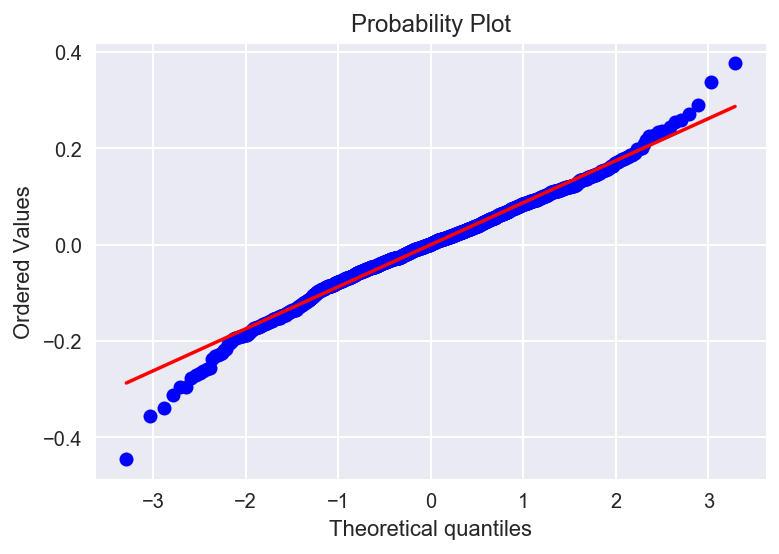

In [113]:
sp.stats.probplot(result2_1.resid, plot=plt)
plt.show()

### 3-3 집값 예측하기

In [114]:
test_new = test[select_1]
test_new = np.log1p(test_new)

test_new2 = test[select_c3]

test_new = pd.concat([test_new, test_new2], axis=1)
test_new.tail()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
2914  7.568896     1.609438     2.079442   7.586296      7.586296    0.000000   
2915  7.546974     1.609438     1.791759   7.586296      7.586296    5.533389   
2916  9.903538     1.791759     2.079442   7.581210      7.599401    7.110696   
2917  9.253591     1.791759     1.791759   7.597396      7.597396    5.823046   
2918  9.172431     2.079442     1.791759   7.597898      7.598399    6.632002   

      TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath   ...     GarageCars  \
2914     6.304449   6.996681      0.000000  0.693147   ...       0.000000   
2915     6.304449   6.996681      0.000000  0.693147   ...       0.693147   
2916     7.110696   7.110696      0.693147  0.693147   ...       1.098612   
2917     6.816736   6.878326      0.000000  0.693147   ...       0.000000   
2918     6.904751   7.601402      0.000000  1.098612   ...       1.386294   

      WoodDeckSF  EnclosedPorch  ScreenPorch    YrSold  Neighborhood  \
2914    0.000000            0.0          0.0  7.604396       MeadowV   
2915    0.000000            0.0          0.0  7.604396       MeadowV   
2916    6.163315            0.0          0.0  7.604396       Mitchel   
2917    4.394449            0.0          0.0  7.604396       Mitchel   
2918    5.252273            0.0          0.0  7.604396       Mitchel   

      ExterQual  KitchenQual BsmtQual MSZoning  
2914         TA           TA       TA       RM  
2915         TA           TA       TA       RM  
2916         TA           TA       TA       RL  
2917         TA           TA       Gd       RL  
2918         TA           TA       Gd       RL  

[5 rows x 23 columns]

In [115]:
y_new = result2_1.predict(test_new)
y_new = np.exp(y_new)
y_new = np.array(y_new)
print(y_new)

[ 122095.0672254   159376.86964991  187452.25119817 ...,  181008.08736062
  122628.64703857  216371.81421424]


In [120]:
submission = pd.read_csv("../Danny/Submit/sample_submission.csv")

submission["SalePrice"] = y_new

print(submission.shape)
submission.head()

(1459, 2)


Id      SalePrice
0  1461  122095.067225
1  1462  159376.869650
2  1463  187452.251198
3  1464  200072.182535
4  1465  196178.892483

In [121]:
submission.to_csv("1_submission.csv", index=False)